In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json

In [2]:
# General parameters
AVERAGE_REPLICATES = True
NB_GENES_TO_PLOT = 0

# Data loading and processing

In [3]:
PATH = "./Data/"

TRANSCRIPTION_DATA = "The40TranscriptomeExpressionData.txt"
COGNITION_GENE_NAMES = "FlyBase_IDs_cognition.txt"
NOMENCLATURE_CONVERSION = "Supplementary_Table1.xls"

In [4]:
# Genes related to cognition from the flybase
cognition_gene_names = pd.read_csv(PATH + COGNITION_GENE_NAMES)
cognition_gene_names.head()

,Genes
0,FBgn0000017
1,FBgn0000108
2,FBgn0000117
3,FBgn0000119
4,FBgn0000229


In [5]:
# Gene names corresponding to each probe 
mapping_gene_names = pd.read_excel(PATH + NOMENCLATURE_CONVERSION, sheet_name = 'Sheet1',usecols = [0, 1], skiprows = 1,
                                        names = ['Probe_Set_ID', 'Flybase_ID'])
mapping_gene_names.head()
print(mapping_gene_names.Probe_Set_ID.is_unique) # Unique Probe IDs
print(mapping_gene_names.Flybase_ID.is_unique) # Not unique Gene IDs -> several probes for some genes
#print(len(mapping))

True
False


In [6]:
# Transcription data
transcription_data = pd.read_csv(PATH + TRANSCRIPTION_DATA, delimiter = '\t')
transcription_data

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,line,RAL_208,RAL_301,RAL_303,RAL_304,RAL_306,RAL_307,RAL_313,RAL_315,RAL_324,...,RAL_714.1,RAL_730.1,RAL_732.1,RAL_765.1,RAL_774.1,RAL_786.1,RAL_799.1,RAL_820.1,RAL_852.1,RAL_859.1
0,sex,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
1,1616608_a_at,15.34089,14.8836,15.10934,15.0655,15.29711,15.34147,15.00705,14.85825,14.77313,...,14.77469,14.90055,14.8767,15.10768,14.75526,15.03041,15.33577,14.8753,15.0519,15.07721
2,1622893_at,15.48201,15.19875,15.62585,15.43466,14.33776,16.07486,14.73604,15.56765,15.54431,...,15.58616,15.61801,15.51449,14.73595,15.34708,15.51292,14.9367,15.40703,14.97601,15.61162
3,1622894_at,9.884323,10.17622,9.829903,9.52355,10.0237,10.63268,10.33599,10.15088,10.09022,...,10.08153,10.82765,9.856011,10.02582,9.885428,9.727585,9.834723,10.11832,9.736137,10.30634
4,1622896_at,10.72857,10.95705,10.60082,10.52731,10.61231,11.20854,10.5882,11.03945,10.56723,...,10.70573,10.98022,10.97839,10.89569,10.97371,10.1024,10.42428,10.52321,10.4534,10.43409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10092,1641476_a_at,12.0541,12.2057,12.1511,12.3008,12.418,12.4131,11.8568,11.9911,12.3494,...,12.7096,12.8624,12.8909,12.5032,12.7926,12.914,12.5787,12.632,12.8294,13.026
10093,1641513_at,10.5971,10.673,10.5734,10.3609,10.6784,10.5763,10.4128,10.6151,10.7712,...,11.3743,11.2171,11.9541,11.4624,11.5274,12.0879,11.5002,11.6226,12.0873,11.7975
10094,1625011_at,11.3854,11.0466,11.0196,11.1349,11.342,11.296,11.0285,10.7292,10.9241,...,11.8257,11.7284,11.9558,11.7292,11.8542,12.2692,12.0147,11.4438,12.0658,11.9543
10095,1634402_at,10.0351,10.0097,9.9581,9.97508,10.003,10.0269,10.0995,9.87346,10.1089,...,10.252,10.1754,10.3799,10.3578,10.5141,10.5415,10.3837,10.2453,10.5414,10.2551


In [7]:
# Create the conversion table between probe names and gene names
mapping = dict(zip(mapping_gene_names.Probe_Set_ID, mapping_gene_names.Flybase_ID))
#print(mapping)

In [8]:
# Apply the mapping to the transcription data table
transcription_data['line'] = transcription_data['line'].map(mapping)

# Just to reset the name of the sex column after having applied the mapping
print(transcription_data.iloc[0,0])
transcription_data.iloc[0,0] = 'sex'
print(transcription_data.iloc[0,0])

nan
sex


In [9]:
transcription_data.head()

,line,RAL_208,RAL_301,RAL_303,RAL_304,RAL_306,RAL_307,RAL_313,RAL_315,RAL_324,...,RAL_714.1,RAL_730.1,RAL_732.1,RAL_765.1,RAL_774.1,RAL_786.1,RAL_799.1,RAL_820.1,RAL_852.1,RAL_859.1
0,sex,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
1,FBgn0001128,15.34089,14.8836,15.10934,15.0655,15.29711,15.34147,15.00705,14.85825,14.77313,...,14.77469,14.90055,14.8767,15.10768,14.75526,15.03041,15.33577,14.8753,15.0519,15.07721
2,FBgn0031035 /// FBgn0040736,15.48201,15.19875,15.62585,15.43466,14.33776,16.07486,14.73604,15.56765,15.54431,...,15.58616,15.61801,15.51449,14.73595,15.34708,15.51292,14.9367,15.40703,14.97601,15.61162
3,FBgn0034454,9.884323,10.17622,9.829903,9.52355,10.0237,10.63268,10.33599,10.15088,10.09022,...,10.08153,10.82765,9.856011,10.02582,9.885428,9.727585,9.834723,10.11832,9.736137,10.30634
4,FBgn0038966,10.72857,10.95705,10.60082,10.52731,10.61231,11.20854,10.5882,11.03945,10.56723,...,10.70573,10.98022,10.97839,10.89569,10.97371,10.1024,10.42428,10.52321,10.4534,10.43409


In [10]:
# Now encode the sex as a binary variable
transcription_data.replace('M', 0.0, inplace=True)
transcription_data.replace('F', 1.0, inplace=True)
sex = transcription_data.loc[0]
transcription_data.head()

,line,RAL_208,RAL_301,RAL_303,RAL_304,RAL_306,RAL_307,RAL_313,RAL_315,RAL_324,...,RAL_714.1,RAL_730.1,RAL_732.1,RAL_765.1,RAL_774.1,RAL_786.1,RAL_799.1,RAL_820.1,RAL_852.1,RAL_859.1
0,sex,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,FBgn0001128,15.34089,14.8836,15.10934,15.0655,15.29711,15.34147,15.00705,14.85825,14.77313,...,14.77469,14.90055,14.8767,15.10768,14.75526,15.03041,15.33577,14.8753,15.0519,15.07721
2,FBgn0031035 /// FBgn0040736,15.48201,15.19875,15.62585,15.43466,14.33776,16.07486,14.73604,15.56765,15.54431,...,15.58616,15.61801,15.51449,14.73595,15.34708,15.51292,14.9367,15.40703,14.97601,15.61162
3,FBgn0034454,9.884323,10.17622,9.829903,9.52355,10.0237,10.63268,10.33599,10.15088,10.09022,...,10.08153,10.82765,9.856011,10.02582,9.885428,9.727585,9.834723,10.11832,9.736137,10.30634
4,FBgn0038966,10.72857,10.95705,10.60082,10.52731,10.61231,11.20854,10.5882,11.03945,10.56723,...,10.70573,10.98022,10.97839,10.89569,10.97371,10.1024,10.42428,10.52321,10.4534,10.43409


In [11]:
transcription_data.set_index('line', inplace=True)
transcription_data.head()

,RAL_208,RAL_301,RAL_303,RAL_304,RAL_306,RAL_307,RAL_313,RAL_315,RAL_324,RAL_335,...,RAL_714.1,RAL_730.1,RAL_732.1,RAL_765.1,RAL_774.1,RAL_786.1,RAL_799.1,RAL_820.1,RAL_852.1,RAL_859.1
line,,,,,,,,,,,,,,,,,,,,,
sex,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
FBgn0001128,15.34089,14.8836,15.10934,15.0655,15.29711,15.34147,15.00705,14.85825,14.77313,14.63788,...,14.77469,14.90055,14.8767,15.10768,14.75526,15.03041,15.33577,14.8753,15.0519,15.07721
FBgn0031035 /// FBgn0040736,15.48201,15.19875,15.62585,15.43466,14.33776,16.07486,14.73604,15.56765,15.54431,14.98228,...,15.58616,15.61801,15.51449,14.73595,15.34708,15.51292,14.9367,15.40703,14.97601,15.61162
FBgn0034454,9.884323,10.17622,9.829903,9.52355,10.0237,10.63268,10.33599,10.15088,10.09022,9.81207,...,10.08153,10.82765,9.856011,10.02582,9.885428,9.727585,9.834723,10.11832,9.736137,10.30634
FBgn0038966,10.72857,10.95705,10.60082,10.52731,10.61231,11.20854,10.5882,11.03945,10.56723,10.72114,...,10.70573,10.98022,10.97839,10.89569,10.97371,10.1024,10.42428,10.52321,10.4534,10.43409


In [12]:
# Convert the data to floats to then perform operations on expression values
transcription_data = transcription_data.astype(float)
print(transcription_data.dtypes)

RAL_208      float64
RAL_301      float64
RAL_303      float64
RAL_304      float64
RAL_306      float64
              ...   
RAL_786.1    float64
RAL_799.1    float64
RAL_820.1    float64
RAL_852.1    float64
RAL_859.1    float64
Length: 80, dtype: object


In [13]:
# Sum the expression levels recording for probes that correspond to the same gene (since it reflects the number of transcripts for this gene)
grouped = transcription_data.groupby(['line']).sum()
grouped

,RAL_208,RAL_301,RAL_303,RAL_304,RAL_306,RAL_307,RAL_313,RAL_315,RAL_324,RAL_335,...,RAL_714.1,RAL_730.1,RAL_732.1,RAL_765.1,RAL_774.1,RAL_786.1,RAL_799.1,RAL_820.1,RAL_852.1,RAL_859.1
line,,,,,,,,,,,,,,,,,,,,,
---,4221.780754,4216.170955,4215.570380,4205.039650,4199.049534,4255.550917,4222.249915,4223.141281,4234.940285,4213.755001,...,4309.182999,4325.195410,4310.073014,4323.788894,4338.259724,4325.492655,4325.808379,4293.618653,4320.373595,4351.404408
CG11853,12.719230,12.557990,12.812670,12.236750,12.442050,12.285450,12.003190,12.017690,12.285210,12.246050,...,11.718680,12.689540,12.747290,11.811050,12.621750,12.237330,12.023220,11.780990,12.436000,12.489910
FBgn0000008,10.968470,10.783060,10.657490,10.906660,10.463530,10.599790,10.553230,10.900330,10.525450,10.088330,...,9.922413,9.738775,9.967959,9.865257,9.898795,9.754535,9.650915,9.798716,9.973386,9.733179
FBgn0000011,9.724721,9.269347,9.423425,9.227149,9.770052,9.492927,9.495222,9.412189,9.732272,9.552688,...,9.168025,9.126094,9.296817,9.194355,9.290895,9.415978,9.120563,9.346430,9.464989,9.252230
FBgn0000014,9.485435,9.633905,9.438266,9.515983,9.601710,9.434828,9.530226,9.466020,9.363816,9.663647,...,9.542980,9.381340,9.507850,9.466904,9.550533,9.654498,9.325283,9.667318,9.271917,9.445289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0069977,10.303740,10.188170,10.189150,10.259100,10.360340,10.292540,10.263160,10.050090,10.381350,10.058330,...,10.154750,10.288080,10.511210,10.601170,10.470510,10.409300,10.673240,10.394910,10.676330,10.456630
FBgn0082585,10.586000,10.326890,10.314670,9.849529,10.289380,10.441300,10.156270,10.128350,10.333480,10.188400,...,10.083650,10.492170,10.716760,10.453540,10.449880,10.791880,10.917550,10.701560,10.720550,10.444090
FBgn0082598,14.034240,14.281690,14.128570,13.816430,13.808450,13.718300,13.935310,13.989900,13.543130,13.916520,...,12.338430,12.622990,12.427400,12.767760,12.511620,13.034530,13.131290,11.784770,12.348770,13.163460


In [14]:
# Drop missing values and values not corresponding to any gene
grouped.dropna(inplace=True)
grouped.drop(index='---', inplace=True)
grouped

,RAL_208,RAL_301,RAL_303,RAL_304,RAL_306,RAL_307,RAL_313,RAL_315,RAL_324,RAL_335,...,RAL_714.1,RAL_730.1,RAL_732.1,RAL_765.1,RAL_774.1,RAL_786.1,RAL_799.1,RAL_820.1,RAL_852.1,RAL_859.1
line,,,,,,,,,,,,,,,,,,,,,
CG11853,12.719230,12.557990,12.812670,12.236750,12.442050,12.285450,12.003190,12.017690,12.285210,12.246050,...,11.718680,12.689540,12.747290,11.811050,12.621750,12.237330,12.023220,11.780990,12.436000,12.489910
FBgn0000008,10.968470,10.783060,10.657490,10.906660,10.463530,10.599790,10.553230,10.900330,10.525450,10.088330,...,9.922413,9.738775,9.967959,9.865257,9.898795,9.754535,9.650915,9.798716,9.973386,9.733179
FBgn0000011,9.724721,9.269347,9.423425,9.227149,9.770052,9.492927,9.495222,9.412189,9.732272,9.552688,...,9.168025,9.126094,9.296817,9.194355,9.290895,9.415978,9.120563,9.346430,9.464989,9.252230
FBgn0000014,9.485435,9.633905,9.438266,9.515983,9.601710,9.434828,9.530226,9.466020,9.363816,9.663647,...,9.542980,9.381340,9.507850,9.466904,9.550533,9.654498,9.325283,9.667318,9.271917,9.445289
FBgn0000015,10.225240,9.600467,10.057940,10.010230,10.150760,10.224460,9.918846,9.750653,10.138040,9.954639,...,10.742280,10.539940,10.539940,10.735130,10.592880,10.527420,10.702770,10.600160,10.635090,10.474280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0069977,10.303740,10.188170,10.189150,10.259100,10.360340,10.292540,10.263160,10.050090,10.381350,10.058330,...,10.154750,10.288080,10.511210,10.601170,10.470510,10.409300,10.673240,10.394910,10.676330,10.456630
FBgn0082585,10.586000,10.326890,10.314670,9.849529,10.289380,10.441300,10.156270,10.128350,10.333480,10.188400,...,10.083650,10.492170,10.716760,10.453540,10.449880,10.791880,10.917550,10.701560,10.720550,10.444090
FBgn0082598,14.034240,14.281690,14.128570,13.816430,13.808450,13.718300,13.935310,13.989900,13.543130,13.916520,...,12.338430,12.622990,12.427400,12.767760,12.511620,13.034530,13.131290,11.784770,12.348770,13.163460


In [15]:
# Just transpose for easily handling data then
transcription_data_ = grouped.T.copy()
transcription_data_

line,CG11853,FBgn0000008,FBgn0000011,FBgn0000014,FBgn0000015,FBgn0000017,FBgn0000018,FBgn0000024,FBgn0000028,FBgn0000032,...,FBgn0069938,FBgn0069964 /// FBgn0058084 /// FBgn0058271,FBgn0069969,FBgn0069972,FBgn0069973,FBgn0069977,FBgn0082585,FBgn0082598,FBgn0083141,sex
RAL_208,12.71923,10.968470,9.724721,9.485435,10.225240,10.047080,10.98815,10.57433,9.267361,11.89597,...,9.590561,9.211811,10.090610,11.25073,21.124860,10.30374,10.586000,14.03424,9.439410,1.0
RAL_301,12.55799,10.783060,9.269347,9.633905,9.600467,10.208720,11.13205,10.37770,9.225645,12.48399,...,9.588649,9.189190,9.665224,12.51409,21.290300,10.18817,10.326890,14.28169,9.194738,1.0
RAL_303,12.81267,10.657490,9.423425,9.438266,10.057940,10.170960,10.86014,10.61116,9.235159,12.50204,...,9.613943,9.209578,10.073570,11.94908,21.083710,10.18915,10.314670,14.12857,9.598054,1.0
RAL_304,12.23675,10.906660,9.227149,9.515983,10.010230,10.175960,11.17082,10.73120,9.085232,12.35876,...,9.528923,9.871735,9.544675,12.35085,21.734030,10.25910,9.849529,13.81643,9.140153,1.0
RAL_306,12.44205,10.463530,9.770052,9.601710,10.150760,10.013470,11.14600,10.81721,9.076431,12.41044,...,9.605901,9.025304,10.079680,12.31612,21.415960,10.36034,10.289380,13.80845,9.074527,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAL_786.1,12.23733,9.754535,9.415978,9.654498,10.527420,9.648694,10.26051,11.23008,9.487459,11.22376,...,11.354620,8.941845,10.488450,12.26650,22.050280,10.40930,10.791880,13.03453,10.631300,0.0
RAL_799.1,12.02322,9.650915,9.120563,9.325283,10.702770,9.711482,10.54958,11.15953,9.815413,11.35639,...,11.541700,8.990204,10.314220,12.60265,21.445990,10.67324,10.917550,13.13129,11.259120,0.0
RAL_820.1,11.78099,9.798716,9.346430,9.667318,10.600160,9.627108,10.07766,10.68271,9.652593,10.94223,...,11.143170,9.267062,10.222820,12.15540,21.750570,10.39491,10.701560,11.78477,10.556510,0.0
RAL_852.1,12.43600,9.973386,9.464989,9.271917,10.635090,9.772692,10.27615,11.15757,9.561801,11.35028,...,11.240680,9.047758,10.454280,12.40691,20.761396,10.67633,10.720550,12.34877,10.754360,0.0


In [16]:
transcription_data_.reset_index(inplace=True)
transcription_data_.rename(columns={'index': 'line'}, index={'line': 'idx'}, inplace=True)

In [17]:
transcription_data_.head()

line,line,CG11853,FBgn0000008,FBgn0000011,FBgn0000014,FBgn0000015,FBgn0000017,FBgn0000018,FBgn0000024,FBgn0000028,...,FBgn0069938,FBgn0069964 /// FBgn0058084 /// FBgn0058271,FBgn0069969,FBgn0069972,FBgn0069973,FBgn0069977,FBgn0082585,FBgn0082598,FBgn0083141,sex
0,RAL_208,12.71923,10.96847,9.724721,9.485435,10.225240,10.04708,10.98815,10.57433,9.267361,...,9.590561,9.211811,10.090610,11.25073,21.12486,10.30374,10.586000,14.03424,9.439410,1.0
1,RAL_301,12.55799,10.78306,9.269347,9.633905,9.600467,10.20872,11.13205,10.37770,9.225645,...,9.588649,9.189190,9.665224,12.51409,21.29030,10.18817,10.326890,14.28169,9.194738,1.0
2,RAL_303,12.81267,10.65749,9.423425,9.438266,10.057940,10.17096,10.86014,10.61116,9.235159,...,9.613943,9.209578,10.073570,11.94908,21.08371,10.18915,10.314670,14.12857,9.598054,1.0
3,RAL_304,12.23675,10.90666,9.227149,9.515983,10.010230,10.17596,11.17082,10.73120,9.085232,...,9.528923,9.871735,9.544675,12.35085,21.73403,10.25910,9.849529,13.81643,9.140153,1.0
4,RAL_306,12.44205,10.46353,9.770052,9.601710,10.150760,10.01347,11.14600,10.81721,9.076431,...,9.605901,9.025304,10.079680,12.31612,21.41596,10.36034,10.289380,13.80845,9.074527,1.0


### Runs the following cells only to average duplicates (may mask some sex-specific effects since replicates are of the opposite sex) so set AVERAGE_REPLICATE to True in this case

In [18]:
if(AVERAGE_REPLICATES):
    # Remove duplicate index '.1' at the end of the line name
    transcription_data_['line'] = transcription_data_.apply(lambda x: str(x['line'])[:-2] if len(str(x['line'])) > 7 else str(x['line']), axis=1)

    # Average the expression levels between replicates
    transcription_data_ = transcription_data_.groupby(['line']).mean()
    transcription_data_.reset_index(inplace=True)
    transcription_data_
else:
    print("Set the variable AVERAGE_REPLICATES to True if you want to average gene expression over replicates")

# Cognition (memory + learning)

In [19]:
# Convert gene names to a list
cognition_gene_names = cognition_gene_names['Genes'].to_list()
cognition_gene_names.append('line')
print(cognition_gene_names)

['FBgn0000017', 'FBgn0000108', 'FBgn0000117', 'FBgn0000119', 'FBgn0000229', 'FBgn0000248', 'FBgn0000273', 'FBgn0000422', 'FBgn0000479', 'FBgn0000535', 'FBgn0000536', 'FBgn0000546', 'FBgn0000635', 'FBgn0000721', 'FBgn0001123', 'FBgn0001208', 'FBgn0002932', 'FBgn0003015', 'FBgn0003068', 'FBgn0003093', 'FBgn0003165', 'FBgn0003301', 'FBgn0003371', 'FBgn0003380', 'FBgn0003392', 'FBgn0003502', 'FBgn0003513', 'FBgn0003520', 'FBgn0003731', 'FBgn0003861', 'FBgn0003897', 'FBgn0003984', 'FBgn0003996', 'FBgn0004101', 'FBgn0004103', 'FBgn0004168', 'FBgn0004244', 'FBgn0004370', 'FBgn0004419', 'FBgn0004516', 'FBgn0004575', 'FBgn0004638', 'FBgn0004647', 'FBgn0004648', 'FBgn0004662', 'FBgn0004837', 'FBgn0004864', 'FBgn0004907', 'FBgn0004956', 'FBgn0005564', 'FBgn0005654', 'FBgn0005672', 'FBgn0010015', 'FBgn0010329', 'FBgn0010333', 'FBgn0010399', 'FBgn0010762', 'FBgn0011582', 'FBgn0011768', 'FBgn0013334', 'FBgn0013759', 'FBgn0014141', 'FBgn0015269', 'FBgn0015380', 'FBgn0016917', 'FBgn0017590', 'FBgn0019

In [20]:
# Just keep columns in the transcription data that correspond to genes related to cognition
cognition_genes = transcription_data_.columns.intersection(cognition_gene_names)
cognition_data = transcription_data_[cognition_genes]
cognition_data.head()

line,line,FBgn0000017,FBgn0000108,FBgn0000119,FBgn0000273,FBgn0000422,FBgn0000479,FBgn0000546,FBgn0000721,FBgn0001208,...,FBgn0045823,FBgn0046114,FBgn0051148,FBgn0051414,FBgn0052062,FBgn0052179,FBgn0052594,FBgn0053517,FBgn0061469,FBgn0067779
0,RAL_208,9.831176,11.225975,10.248877,20.922845,11.217610,10.754210,9.405444,13.907805,13.406505,...,14.544430,10.200250,10.793395,19.728825,11.070230,11.006695,9.128393,9.381380,11.677840,10.991760
1,RAL_301,10.040115,11.115885,10.286174,23.659090,11.156355,10.818160,9.538228,13.671625,13.603470,...,14.484155,10.081410,12.146140,21.108798,10.964490,10.900940,9.256436,9.392713,11.690610,10.943055
2,RAL_303,9.917243,11.205420,10.367672,22.278525,11.335390,10.758225,9.509280,13.730805,13.507180,...,14.372540,10.139295,10.400270,19.660724,11.034600,10.812120,9.703943,9.348546,11.747700,10.868890
3,RAL_304,9.923009,11.696985,10.466940,21.521275,11.400920,11.132105,9.551654,13.930000,14.164240,...,14.670585,10.254040,10.726625,20.018352,11.189590,10.991125,9.220436,9.306893,11.422755,10.865350
4,RAL_306,9.858007,11.765400,10.236290,21.416915,11.439365,11.064200,9.282438,13.981160,14.046320,...,14.543030,10.166745,10.647610,19.543889,11.125125,10.873460,9.163552,9.390727,11.552855,10.920610


In [21]:
# Barplot visualization of the expression levels of a gene accross lines

def plot_histo_expression(gene, data_):
    sns.set() # Set the seaborn default aesthetics 

    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.barplot(x ='line', y =gene, data = data_);

    #ax.get_legend().remove()
    ax.set_title(gene);
    ax.set(ylabel='Expression', xlabel='Lines');
    ax.set_xticklabels(data_['line'], rotation=90); # Vertical labels for the x axis

In [22]:
genes_cognition = cognition_data.columns.values.tolist()
genes_cognition.pop(0)
#genes

'line'

In [23]:
for i in range(NB_GENES_TO_PLOT):
    plot_histo_expression(genes_cognition[i], cognition_data)

In [24]:
# Statistics
stats_cognition = pd.DataFrame()
stats_cognition['gene'] = genes_cognition # genes of interest

stats_cognition['variance'] = stats_cognition.apply(lambda x: cognition_data[x['gene']].var(), axis=1)
stats_cognition['std'] = stats_cognition.apply(lambda x: cognition_data[x['gene']].std(), axis=1)
stats_cognition['mean'] = stats_cognition.apply(lambda x: cognition_data[x['gene']].mean(), axis=1)
stats_cognition['min'] = stats_cognition.apply(lambda x: cognition_data[x['gene']].min(), axis=1)
stats_cognition['max'] = stats_cognition.apply(lambda x: cognition_data[x['gene']].max(), axis=1)
stats_cognition['range'] = stats_cognition.apply(lambda x: np.abs(x['max']-x['min']), axis=1)

In [25]:
stats_cognition

,gene,variance,std,mean,min,max,range
0,FBgn0000017,0.011007,0.104914,9.961146,9.785276,10.225500,0.440224
1,FBgn0000108,0.055323,0.235208,11.366579,10.601365,11.929330,1.327965
2,FBgn0000119,0.046287,0.215145,10.275474,9.374267,10.671725,1.297458
3,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
4,FBgn0000422,0.054722,0.233927,11.390508,10.552450,11.879595,1.327145
...,...,...,...,...,...,...,...
74,FBgn0052179,0.017498,0.132278,10.905551,10.553440,11.116005,0.562565
75,FBgn0052594,0.049345,0.222138,9.388470,9.119261,9.895239,0.775978
76,FBgn0053517,0.008135,0.090192,9.408914,9.241311,9.611788,0.370477
77,FBgn0061469,0.038815,0.197014,11.617854,11.232275,12.128705,0.896430


In [26]:
#stats_.set_index('gene', inplace=True)
#stats_.head()

In [27]:
# Plot the distribution of a statistics across genes
def plot_histo_gene_stats(stat, data_):
    sns.set() # Set the seaborn default aesthetics 

    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.barplot(x ='gene', y =stat, data = data_);

    #ax.get_legend().remove()
    ax.set_title('Distribution of ' + stat);
    ax.set(ylabel='Value', xlabel='Genes');
    ax.set_xticklabels(data_['gene'], rotation=90); # Vertical labels for the x axis
    
# Plot the variance vs mean for each gene
def plot_var_vs_mean(data_):
    sns.set() # Set the seaborn default aesthetics 
    
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.scatterplot(x = 'variance', y = 'mean', data = data_);

    #ax.get_legend().remove()
    ax.set_title('Variance vs mean over genes');
    ax.set(ylabel='Variance', xlabel='Mean');

In [28]:
var_genes = {} # Dict to store genes that show the highest variance in expression across lines

In [29]:
stats_cognition.sort_values(by=['variance'], ascending=False, inplace=True)
stats_cognition

,gene,variance,std,mean,min,max,range
3,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
71,FBgn0051148,0.251027,0.501026,10.904438,9.989963,12.146140,2.156177
72,FBgn0051414,0.196038,0.442761,19.837012,19.222993,21.108798,1.885806
16,FBgn0003520,0.155551,0.394400,11.435261,10.759770,12.144595,1.384825
39,FBgn0013334,0.152227,0.390162,22.828534,21.734060,23.645685,1.911625
...,...,...,...,...,...,...,...
0,FBgn0000017,0.011007,0.104914,9.961146,9.785276,10.225500,0.440224
35,FBgn0010329,0.008848,0.094066,9.551801,9.357019,9.754027,0.397008
76,FBgn0053517,0.008135,0.090192,9.408914,9.241311,9.611788,0.370477
54,FBgn0031855,0.007982,0.089343,9.633315,9.472905,9.857070,0.384165


In [30]:
#threshold = 0.5
#high_variance = stats[stats['variance'] >= threshold] # subjective
#print(len(high_variance))
#plot_histo_gene_stats('variance', high_variance)

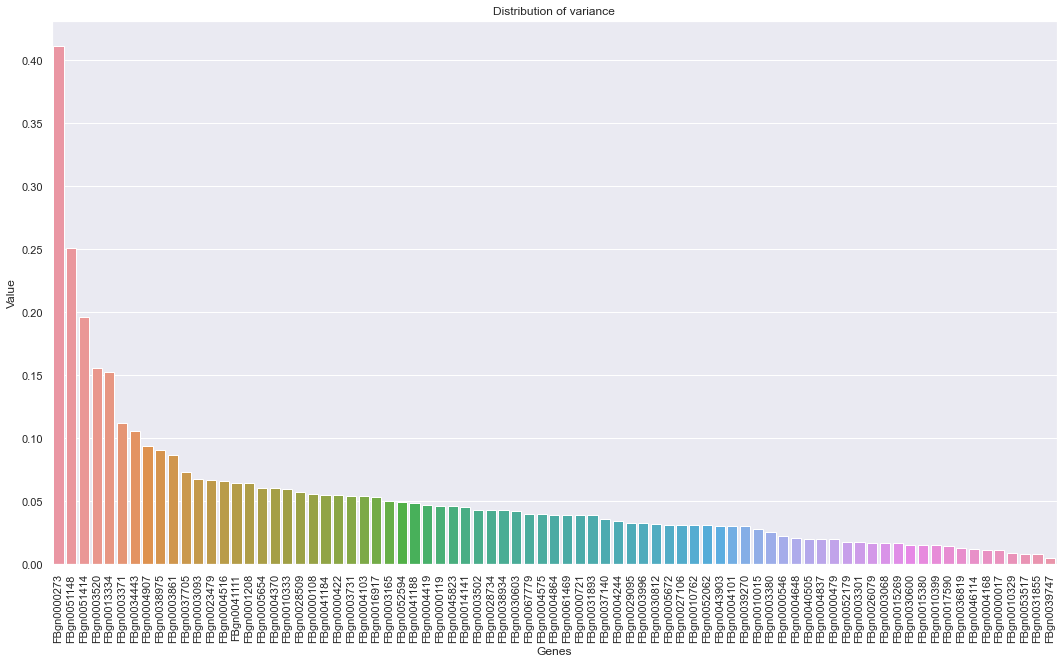

In [31]:
plot_histo_gene_stats('variance', stats_cognition)

In [32]:
var_genes['cognition'] = list(stats_cognition.iloc[:10,0].values)
var_genes

{'cognition': ['FBgn0000273',
  'FBgn0051148',
  'FBgn0051414',
  'FBgn0003520',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0034443',
  'FBgn0004907',
  'FBgn0038975',
  'FBgn0003861']}

In [33]:
stats_cognition.sort_values(by=['range'], ascending=False, inplace=True)
stats_cognition

,gene,variance,std,mean,min,max,range
3,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
71,FBgn0051148,0.251027,0.501026,10.904438,9.989963,12.146140,2.156177
39,FBgn0013334,0.152227,0.390162,22.828534,21.734060,23.645685,1.911625
61,FBgn0038975,0.090415,0.300691,10.815320,9.453778,11.359660,1.905882
72,FBgn0051414,0.196038,0.442761,19.837012,19.222993,21.108798,1.885806
...,...,...,...,...,...,...,...
0,FBgn0000017,0.011007,0.104914,9.961146,9.785276,10.225500,0.440224
35,FBgn0010329,0.008848,0.094066,9.551801,9.357019,9.754027,0.397008
54,FBgn0031855,0.007982,0.089343,9.633315,9.472905,9.857070,0.384165
76,FBgn0053517,0.008135,0.090192,9.408914,9.241311,9.611788,0.370477


In [34]:
#threshold = 5.0
#threshold = 6.0
#high_range = stats_[stats_['range'] >= threshold] # subjective
#print(len(high_range))
#plot_histo_gene_stats('range', high_range)

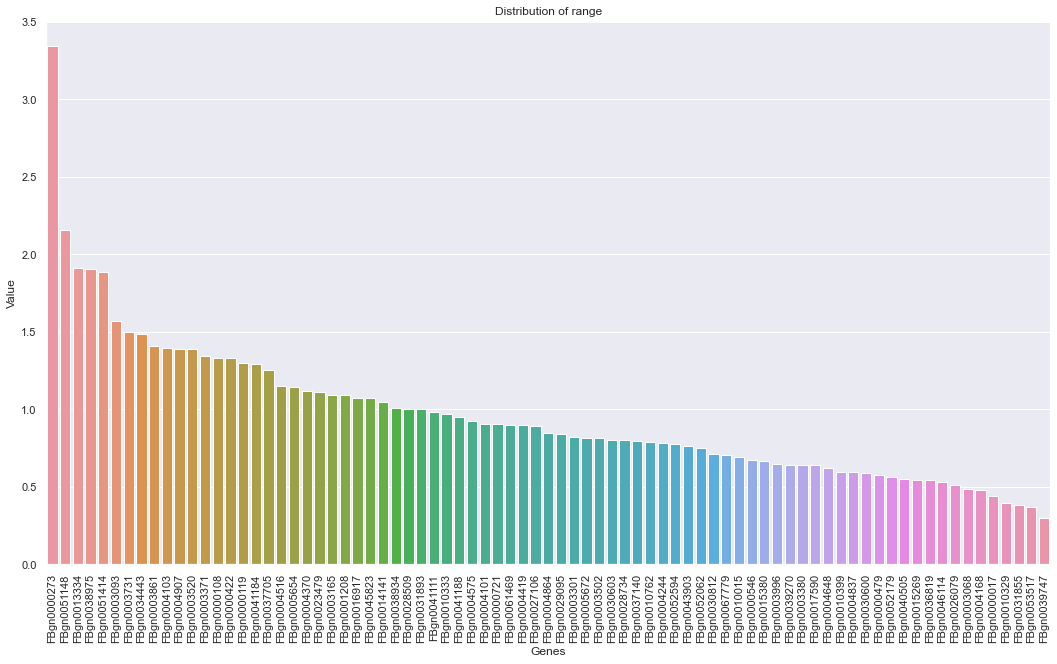

In [35]:
plot_histo_gene_stats('range', stats_cognition)

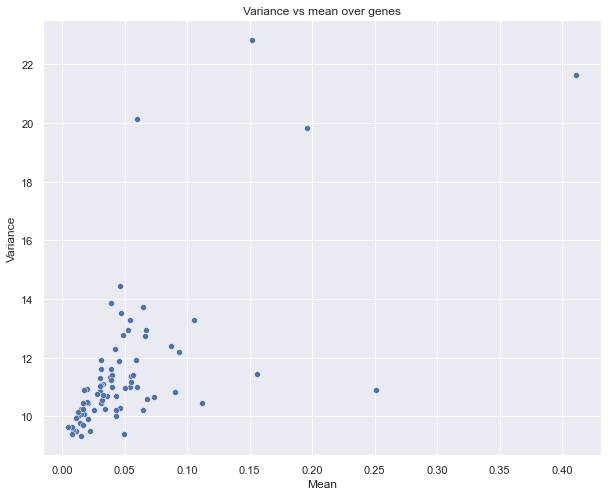

In [36]:
plot_var_vs_mean(stats_cognition)

# Learning only

In [37]:
# Genes related to learning only
LEARNING_GENE_NAMES = 'FlyBase_IDs_learning.txt'

learning_gene_names = pd.read_csv(PATH + LEARNING_GENE_NAMES)
learning_gene_names.head()

,Genes
0,FBgn0000248
1,FBgn0000273
2,FBgn0000479
3,FBgn0000535
4,FBgn0000536


In [38]:
learning_gene_names = learning_gene_names['Genes'].to_list()
learning_gene_names.append('line')
print(learning_gene_names)

['FBgn0000248', 'FBgn0000273', 'FBgn0000479', 'FBgn0000535', 'FBgn0000536', 'FBgn0000635', 'FBgn0000721', 'FBgn0003015', 'FBgn0003301', 'FBgn0003371', 'FBgn0003392', 'FBgn0003502', 'FBgn0003731', 'FBgn0003861', 'FBgn0003897', 'FBgn0003984', 'FBgn0004103', 'FBgn0004244', 'FBgn0004419', 'FBgn0004516', 'FBgn0004575', 'FBgn0004638', 'FBgn0004662', 'FBgn0005564', 'FBgn0005654', 'FBgn0005672', 'FBgn0010329', 'FBgn0010399', 'FBgn0010762', 'FBgn0011582', 'FBgn0011768', 'FBgn0013334', 'FBgn0015269', 'FBgn0015380', 'FBgn0019985', 'FBgn0024248', 'FBgn0024944', 'FBgn0026401', 'FBgn0028734', 'FBgn0030812', 'FBgn0035538', 'FBgn0036819', 'FBgn0037140', 'FBgn0038975', 'FBgn0039270', 'FBgn0039560', 'FBgn0039747', 'FBgn0040372', 'FBgn0040505', 'FBgn0041188', 'FBgn0043005', 'FBgn0050077', 'FBgn0052179', 'FBgn0066324', 'FBgn0066330', 'FBgn0086370', 'FBgn0086782', 'FBgn0086912', 'FBgn0250823', 'FBgn0259108', 'FBgn0259168', 'FBgn0259243', 'FBgn0262477', 'FBgn0262739', 'FBgn0262866', 'FBgn0263860', 'FBgn0263

In [39]:
learning_genes = transcription_data_.columns.intersection(learning_gene_names)
learning_data = transcription_data_[learning_genes]
learning_data

line,line,FBgn0000273,FBgn0000479,FBgn0000721,FBgn0003301,FBgn0003371,FBgn0003502,FBgn0003731,FBgn0003861,FBgn0004103,...,FBgn0028734,FBgn0030812,FBgn0036819,FBgn0037140,FBgn0038975,FBgn0039270,FBgn0039747,FBgn0040505,FBgn0041188,FBgn0052179
0,RAL_208,20.922845,10.754210,13.907805,10.022690,10.498765,9.909830,10.908850,12.539920,13.294975,...,9.705041,10.492925,9.969867,10.478990,9.453778,11.012790,9.620844,9.831084,12.858620,11.006695
1,RAL_301,23.659090,10.818160,13.671625,9.967798,10.730610,10.257375,9.779171,12.407115,13.210485,...,10.154345,10.657520,9.870909,10.502340,10.722175,11.112125,9.698533,9.868873,12.494990,10.900940
2,RAL_303,22.278525,10.758225,13.730805,10.181645,10.683530,10.110738,10.984550,11.638940,13.244975,...,9.791338,10.563194,10.116642,10.711725,10.604975,11.026530,9.695930,9.745894,12.709765,10.812120
3,RAL_304,21.521275,11.132105,13.930000,10.178675,10.900375,10.222790,10.957030,12.615405,13.297000,...,9.746952,10.571400,10.059475,11.053035,10.632490,11.034500,9.633232,9.915533,12.925655,10.991125
4,RAL_306,21.416915,11.064200,13.981160,10.176760,10.900400,10.331026,11.168615,12.177310,13.368230,...,9.716772,10.512605,10.072320,10.892290,10.704140,10.962585,9.724958,10.021068,12.797775,10.873460
5,RAL_307,22.384635,10.647910,14.170650,10.032433,10.472085,10.441865,10.932675,12.195890,13.430080,...,10.409057,10.552823,10.159954,10.650065,10.540615,11.100525,9.487812,9.918365,13.030270,10.778900
6,RAL_313,21.035041,10.889375,13.312320,10.086636,10.058600,10.096858,10.743990,12.201500,13.025685,...,10.046149,10.566178,9.971412,10.511530,10.846540,10.912100,9.567954,9.798058,12.329235,10.813480
7,RAL_315,21.520610,11.188970,13.620175,10.141795,10.339655,10.420776,10.834000,12.340430,13.232790,...,9.736069,10.830360,10.064253,10.440880,10.817445,11.229610,9.608554,9.875006,12.604355,10.834625
8,RAL_324,21.595235,11.027870,13.816700,10.018963,11.298555,10.273934,10.810090,12.832555,13.363010,...,9.755329,10.399043,10.114734,11.010275,11.029215,11.121845,9.615475,10.089841,13.048550,10.752660
9,RAL_335,21.465785,10.784905,13.564155,10.211885,10.147830,10.205558,10.963920,12.030835,13.011590,...,9.922449,10.579290,9.995190,10.681590,10.597995,10.996715,9.743424,9.876413,12.637860,10.787185


In [40]:
genes_learning = learning_data.columns.values.tolist()
genes_learning.pop(0)
#genes

'line'

In [41]:
for i in range(NB_GENES_TO_PLOT):
    plot_histo_expression(genes_learning[i], learning_data)

In [42]:
# Statistics
stats_learning = pd.DataFrame()
stats_learning['gene'] = genes_learning # genes of interest

stats_learning['variance'] = stats_learning.apply(lambda x: learning_data[x['gene']].var(), axis=1)
stats_learning['std'] = stats_learning.apply(lambda x: learning_data[x['gene']].std(), axis=1)
stats_learning['mean'] = stats_learning.apply(lambda x: learning_data[x['gene']].mean(), axis=1)
stats_learning['min'] = stats_learning.apply(lambda x: learning_data[x['gene']].min(), axis=1)
stats_learning['max'] = stats_learning.apply(lambda x: learning_data[x['gene']].max(), axis=1)
stats_learning['range'] = stats_learning.apply(lambda x: np.abs(x['max']-x['min']), axis=1)

In [43]:
stats_learning.head()

,gene,variance,std,mean,min,max,range
0,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
1,FBgn0000479,0.019574,0.139906,10.944259,10.647910,11.221035,0.573125
2,FBgn0000721,0.038795,0.196965,13.855214,13.312320,14.215285,0.902965
3,FBgn0003301,0.017472,0.132183,10.088623,9.471435,10.292820,0.821385
4,FBgn0003371,0.111880,0.334485,10.451474,9.952581,11.298555,1.345974


In [44]:
stats_learning.sort_values(by=['variance'], ascending=False, inplace=True)
stats_learning.head()

,gene,variance,std,mean,min,max,range
0,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
18,FBgn0013334,0.152227,0.390162,22.828534,21.734060,23.645685,1.911625
4,FBgn0003371,0.111880,0.334485,10.451474,9.952581,11.298555,1.345974
25,FBgn0038975,0.090415,0.300691,10.815320,9.453778,11.359660,1.905882
7,FBgn0003861,0.086919,0.294820,12.410823,11.638940,13.045325,1.406385


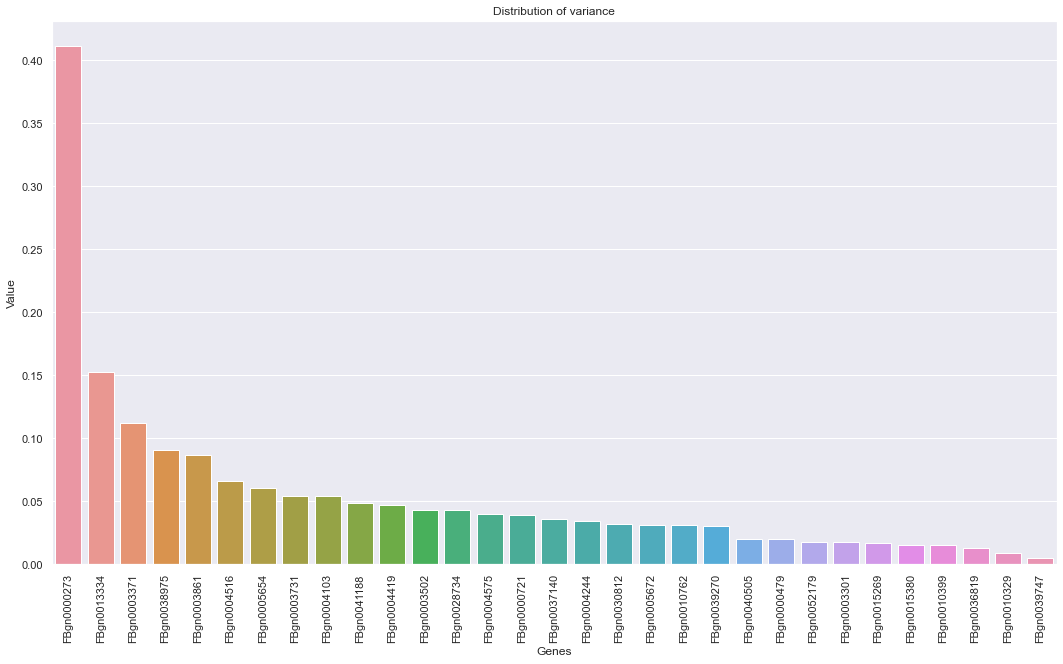

In [45]:
plot_histo_gene_stats('variance', stats_learning)

In [46]:
var_genes['learning'] = list(stats_learning.iloc[:5,0].values)
var_genes

{'cognition': ['FBgn0000273',
  'FBgn0051148',
  'FBgn0051414',
  'FBgn0003520',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0034443',
  'FBgn0004907',
  'FBgn0038975',
  'FBgn0003861'],
 'learning': ['FBgn0000273',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0038975',
  'FBgn0003861']}

In [47]:
stats_learning.sort_values(by=['range'], ascending=False, inplace=True)
stats_learning.head()

,gene,variance,std,mean,min,max,range
0,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
18,FBgn0013334,0.152227,0.390162,22.828534,21.734060,23.645685,1.911625
25,FBgn0038975,0.090415,0.300691,10.815320,9.453778,11.359660,1.905882
6,FBgn0003731,0.054298,0.233019,10.988263,9.779171,11.274515,1.495344
7,FBgn0003861,0.086919,0.294820,12.410823,11.638940,13.045325,1.406385


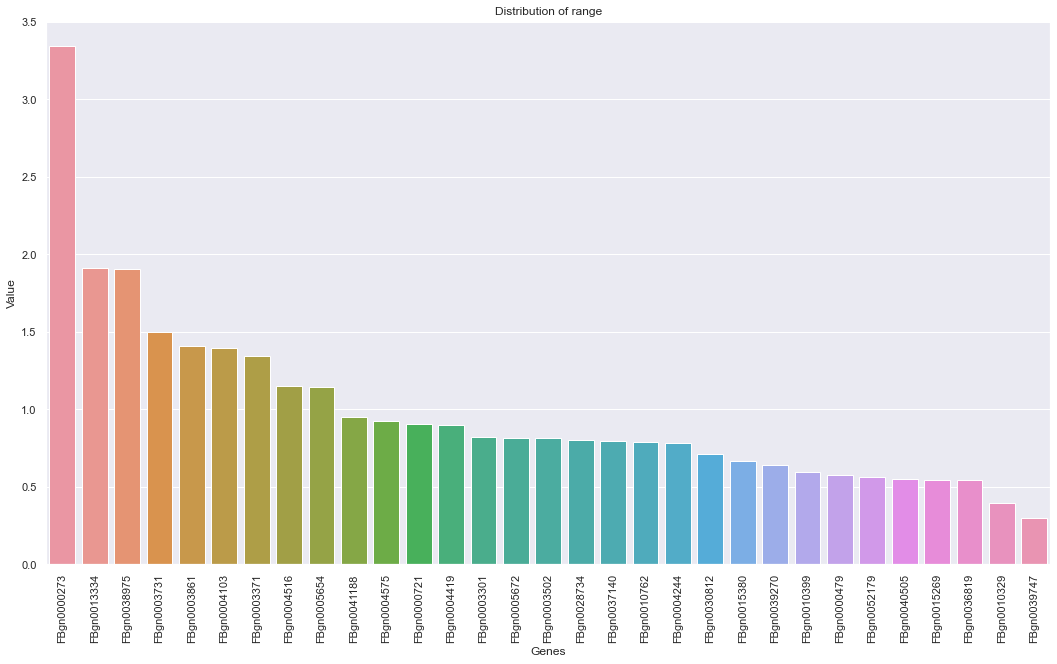

In [48]:
plot_histo_gene_stats('range', stats_learning)

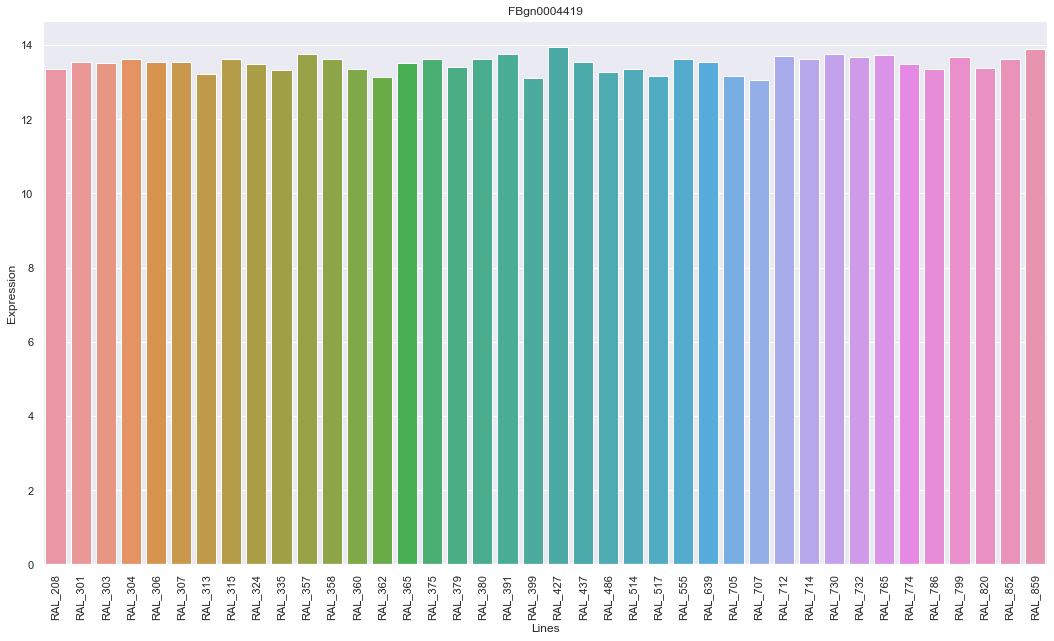

In [49]:
plot_histo_expression('FBgn0004419', learning_data)

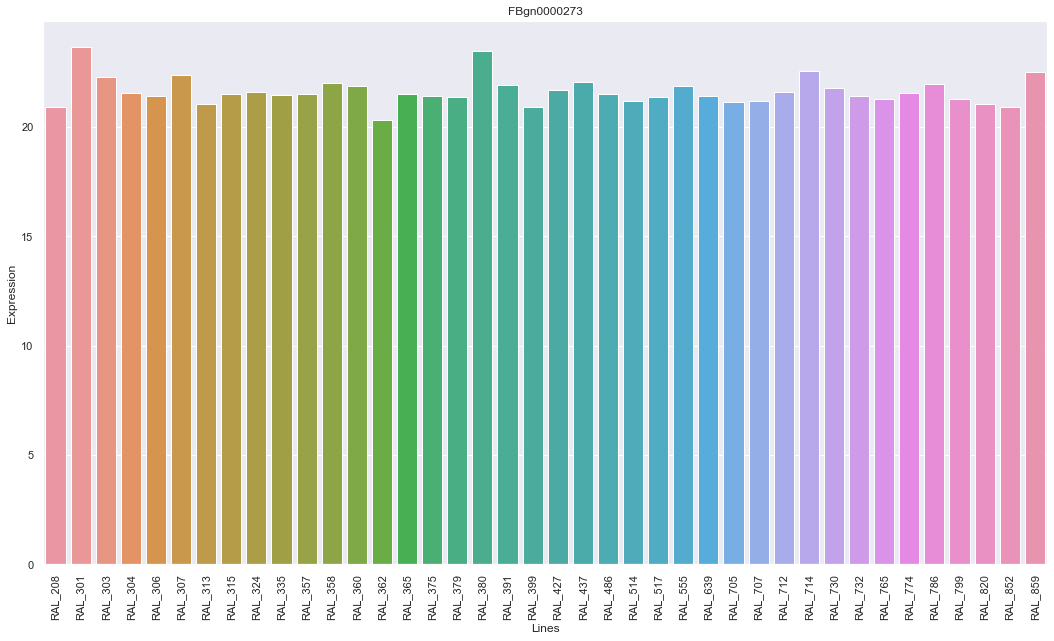

In [50]:
plot_histo_expression('FBgn0000273', learning_data)

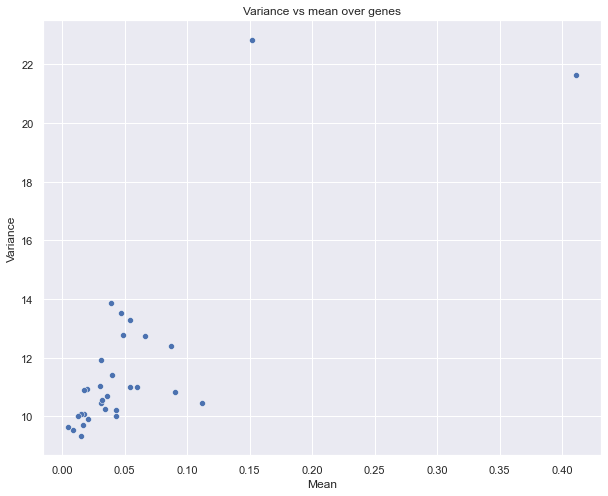

In [51]:
plot_var_vs_mean(stats_learning)

# Memory only

In [52]:
# Genes related to memory only
MEMORY_GENE_NAMES = 'FlyBase_IDs_memory.txt'

memory_gene_names = pd.read_csv(PATH + MEMORY_GENE_NAMES)
memory_gene_names.head()

,Genes
0,FBgn0000108
1,FBgn0000117
2,FBgn0000119
3,FBgn0000229
4,FBgn0000273


In [53]:
memory_gene_names = memory_gene_names['Genes'].to_list()
memory_gene_names.append('line')
print(memory_gene_names)

['FBgn0000108', 'FBgn0000117', 'FBgn0000119', 'FBgn0000229', 'FBgn0000273', 'FBgn0000422', 'FBgn0000479', 'FBgn0000536', 'FBgn0000546', 'FBgn0000635', 'FBgn0000721', 'FBgn0001208', 'FBgn0002932', 'FBgn0003015', 'FBgn0003068', 'FBgn0003093', 'FBgn0003165', 'FBgn0003301', 'FBgn0003392', 'FBgn0003513', 'FBgn0003520', 'FBgn0003996', 'FBgn0004101', 'FBgn0004168', 'FBgn0004370', 'FBgn0004575', 'FBgn0004638', 'FBgn0004647', 'FBgn0004648', 'FBgn0004837', 'FBgn0004864', 'FBgn0004956', 'FBgn0010015', 'FBgn0010329', 'FBgn0010333', 'FBgn0010399', 'FBgn0011582', 'FBgn0013759', 'FBgn0014141', 'FBgn0015269', 'FBgn0015380', 'FBgn0016917', 'FBgn0017590', 'FBgn0019985', 'FBgn0022349', 'FBgn0023023', 'FBgn0023479', 'FBgn0026079', 'FBgn0026401', 'FBgn0027106', 'FBgn0027107', 'FBgn0028397', 'FBgn0028509', 'FBgn0028734', 'FBgn0029095', 'FBgn0029891', 'FBgn0030412', 'FBgn0030600', 'FBgn0030603', 'FBgn0031855', 'FBgn0031893', 'FBgn0034443', 'FBgn0035016', 'FBgn0035770', 'FBgn0036819', 'FBgn0036896', 'FBgn0037

In [54]:
memory_genes = transcription_data_.columns.intersection(memory_gene_names)
memory_data = transcription_data_[memory_genes]
memory_data

line,line,FBgn0000108,FBgn0000119,FBgn0000273,FBgn0000422,FBgn0000479,FBgn0000546,FBgn0000721,FBgn0001208,FBgn0003068,...,FBgn0043903,FBgn0045823,FBgn0046114,FBgn0051148,FBgn0051414,FBgn0052062,FBgn0052594,FBgn0053517,FBgn0061469,FBgn0067779
0,RAL_208,11.225975,10.248877,20.922845,11.217610,10.754210,9.405444,13.907805,13.406505,10.104896,...,11.266490,14.544430,10.200250,10.793395,19.728825,11.070230,9.128393,9.381380,11.677840,10.991760
1,RAL_301,11.115885,10.286174,23.659090,11.156355,10.818160,9.538228,13.671625,13.603470,10.239145,...,11.229395,14.484155,10.081410,12.146140,21.108798,10.964490,9.256436,9.392713,11.690610,10.943055
2,RAL_303,11.205420,10.367672,22.278525,11.335390,10.758225,9.509280,13.730805,13.507180,10.153105,...,11.191730,14.372540,10.139295,10.400270,19.660724,11.034600,9.703943,9.348546,11.747700,10.868890
3,RAL_304,11.696985,10.466940,21.521275,11.400920,11.132105,9.551654,13.930000,14.164240,10.003320,...,11.127225,14.670585,10.254040,10.726625,20.018352,11.189590,9.220436,9.306893,11.422755,10.865350
4,RAL_306,11.765400,10.236290,21.416915,11.439365,11.064200,9.282438,13.981160,14.046320,10.074450,...,11.145690,14.543030,10.166745,10.647610,19.543889,11.125125,9.163552,9.390727,11.552855,10.920610
5,RAL_307,11.733975,10.671725,22.384635,11.330095,10.647910,9.719993,14.170650,13.764535,10.075605,...,11.359365,14.564960,10.188430,11.741995,19.624943,11.259460,9.663822,9.309527,11.544040,11.352880
6,RAL_313,11.097165,10.136809,21.035041,11.252380,10.889375,9.406001,13.312320,13.135500,10.140255,...,11.174160,14.109950,10.159600,10.467165,19.738573,10.812030,9.292738,9.488122,11.407865,10.852420
7,RAL_315,11.108485,10.325380,21.520610,11.329115,11.188970,9.321826,13.620175,13.397655,10.229745,...,11.368835,14.393380,10.117990,10.628555,20.926285,10.915165,9.379518,9.419132,11.710905,11.270495
8,RAL_324,11.532140,10.329090,21.595235,11.308845,11.027870,9.642565,13.816700,13.482330,10.112710,...,11.347905,14.222210,10.145825,11.022050,19.314194,11.018985,9.212407,9.501510,11.556005,10.943370
9,RAL_335,11.300590,10.123690,21.465785,11.084830,10.784905,9.435053,13.564155,13.820515,10.138920,...,11.150805,14.169970,9.985563,10.227530,19.883894,10.738370,9.183662,9.411437,11.420570,10.904685


In [55]:
genes_memory = memory_data.columns.values.tolist()
genes_memory.pop(0)
#genes

'line'

In [56]:
for i in range(NB_GENES_TO_PLOT):
    plot_histo_expression(genes_memory[i], memory_data)

In [57]:
# Statistics
stats_memory = pd.DataFrame()
stats_memory['gene'] = genes_memory # genes of interest

stats_memory['variance'] = stats_memory.apply(lambda x: memory_data[x['gene']].var(), axis=1)
stats_memory['std'] = stats_memory.apply(lambda x: memory_data[x['gene']].std(), axis=1)
stats_memory['mean'] = stats_memory.apply(lambda x: memory_data[x['gene']].mean(), axis=1)
stats_memory['min'] = stats_memory.apply(lambda x: memory_data[x['gene']].min(), axis=1)
stats_memory['max'] = stats_memory.apply(lambda x: memory_data[x['gene']].max(), axis=1)
stats_memory['range'] = stats_memory.apply(lambda x: np.abs(x['max']-x['min']), axis=1)

In [58]:
stats_memory.head()

,gene,variance,std,mean,min,max,range
0,FBgn0000108,0.055323,0.235208,11.366579,10.601365,11.929330,1.327965
1,FBgn0000119,0.046287,0.215145,10.275474,9.374267,10.671725,1.297458
2,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
3,FBgn0000422,0.054722,0.233927,11.390508,10.552450,11.879595,1.327145
4,FBgn0000479,0.019574,0.139906,10.944259,10.647910,11.221035,0.573125


In [59]:
stats_memory.sort_values(by=['variance'], ascending=False, inplace=True)
stats_memory.head()

,gene,variance,std,mean,min,max,range
2,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
50,FBgn0051148,0.251027,0.501026,10.904438,9.989963,12.146140,2.156177
51,FBgn0051414,0.196038,0.442761,19.837012,19.222993,21.108798,1.885806
12,FBgn0003520,0.155551,0.394400,11.435261,10.759770,12.144595,1.384825
40,FBgn0034443,0.105499,0.324806,13.276750,12.679375,14.163475,1.484100


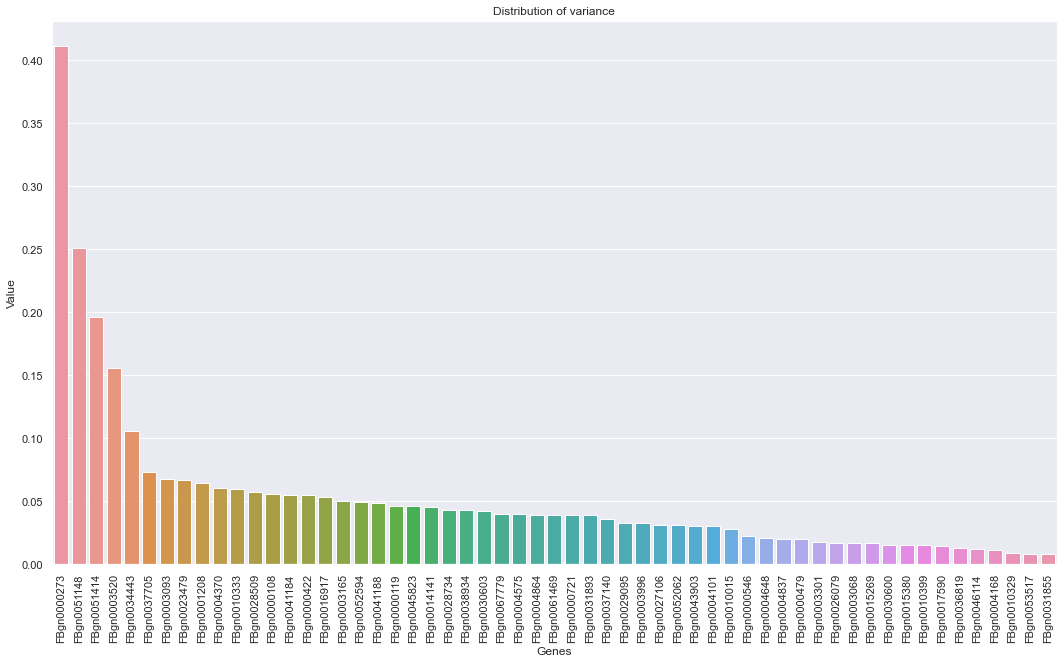

In [60]:
plot_histo_gene_stats('variance', stats_memory)

In [61]:
var_genes['memory'] = list(stats_memory.iloc[:5,0].values)
var_genes

{'cognition': ['FBgn0000273',
  'FBgn0051148',
  'FBgn0051414',
  'FBgn0003520',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0034443',
  'FBgn0004907',
  'FBgn0038975',
  'FBgn0003861'],
 'learning': ['FBgn0000273',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0038975',
  'FBgn0003861'],
 'memory': ['FBgn0000273',
  'FBgn0051148',
  'FBgn0051414',
  'FBgn0003520',
  'FBgn0034443']}

In [62]:
stats_memory.sort_values(by=['range'], ascending=False, inplace=True)
stats_memory.head()

,gene,variance,std,mean,min,max,range
2,FBgn0000273,0.410668,0.640834,21.630299,20.319696,23.659090,3.339393
50,FBgn0051148,0.251027,0.501026,10.904438,9.989963,12.146140,2.156177
51,FBgn0051414,0.196038,0.442761,19.837012,19.222993,21.108798,1.885806
9,FBgn0003093,0.067938,0.260650,10.599626,10.163570,11.732805,1.569235
40,FBgn0034443,0.105499,0.324806,13.276750,12.679375,14.163475,1.484100


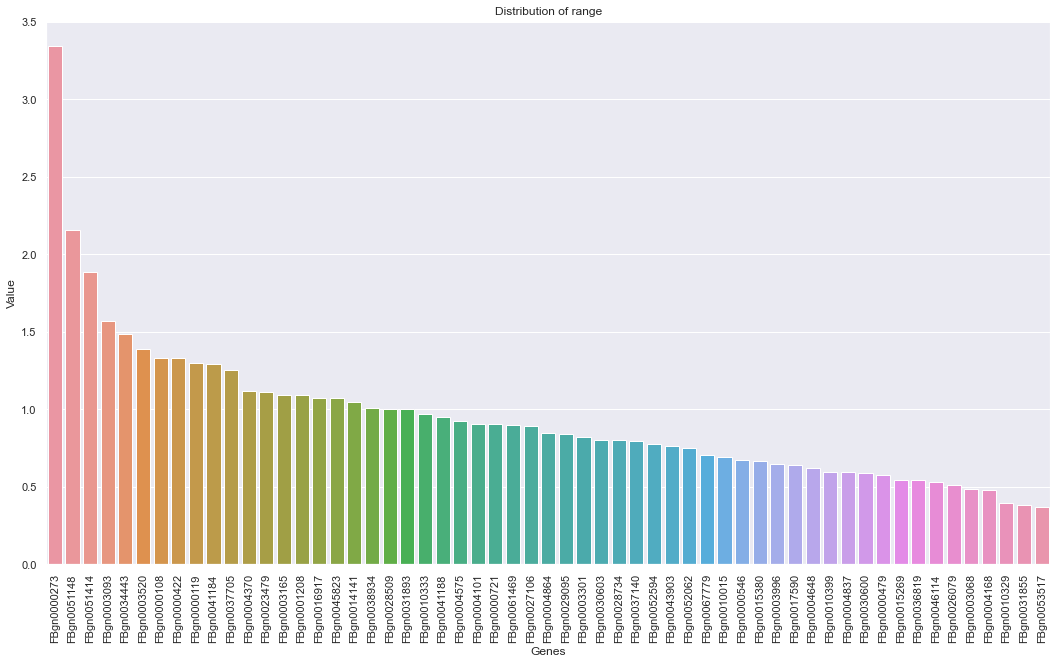

In [63]:
plot_histo_gene_stats('range', stats_memory)

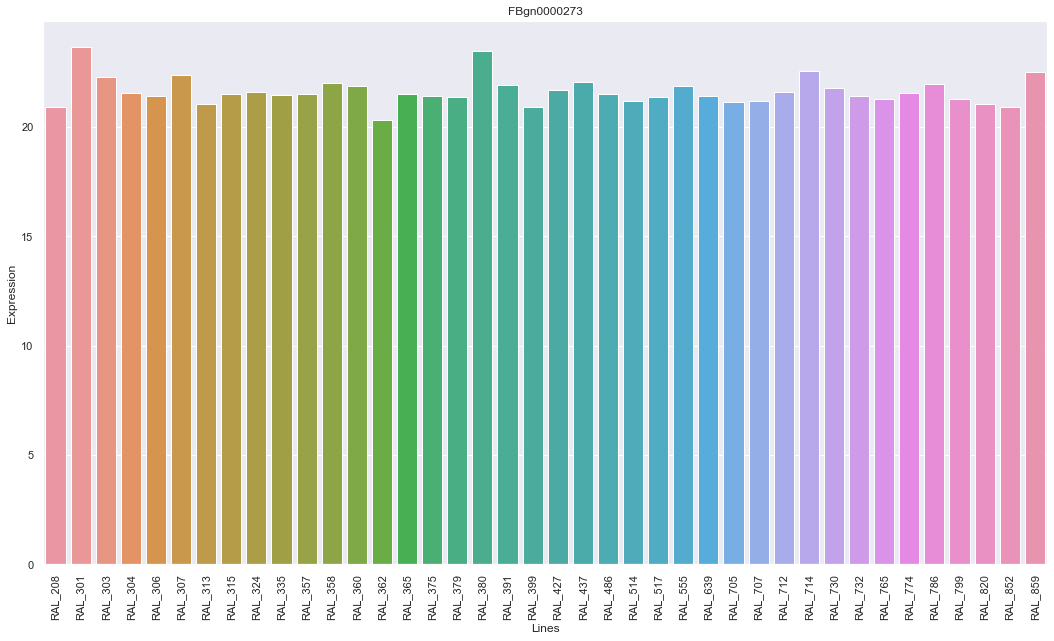

In [64]:
plot_histo_expression('FBgn0000273', memory_data)

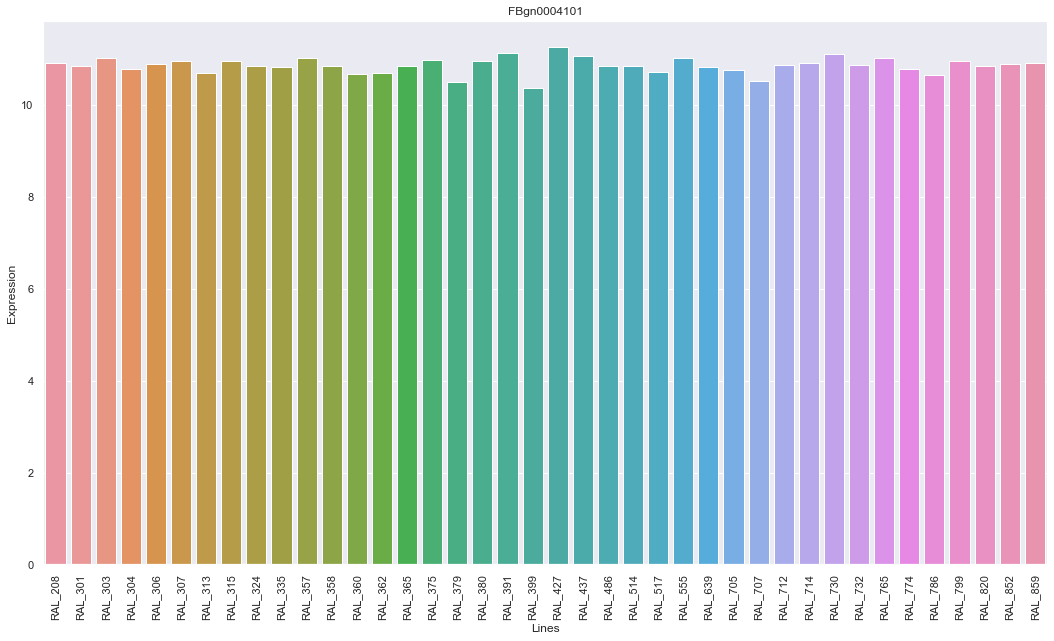

In [65]:
plot_histo_expression('FBgn0004101', memory_data)

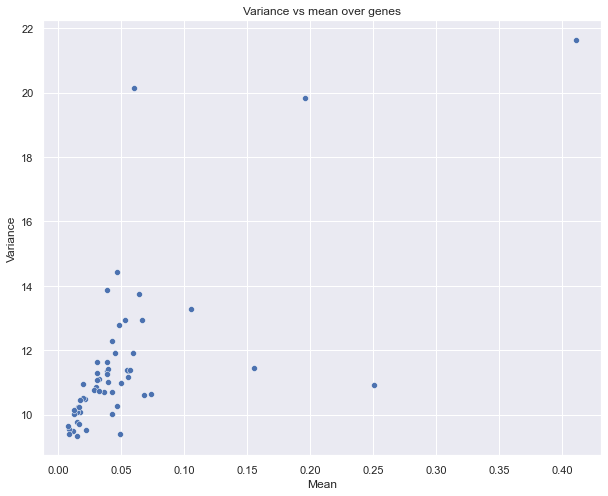

In [66]:
plot_var_vs_mean(stats_memory)

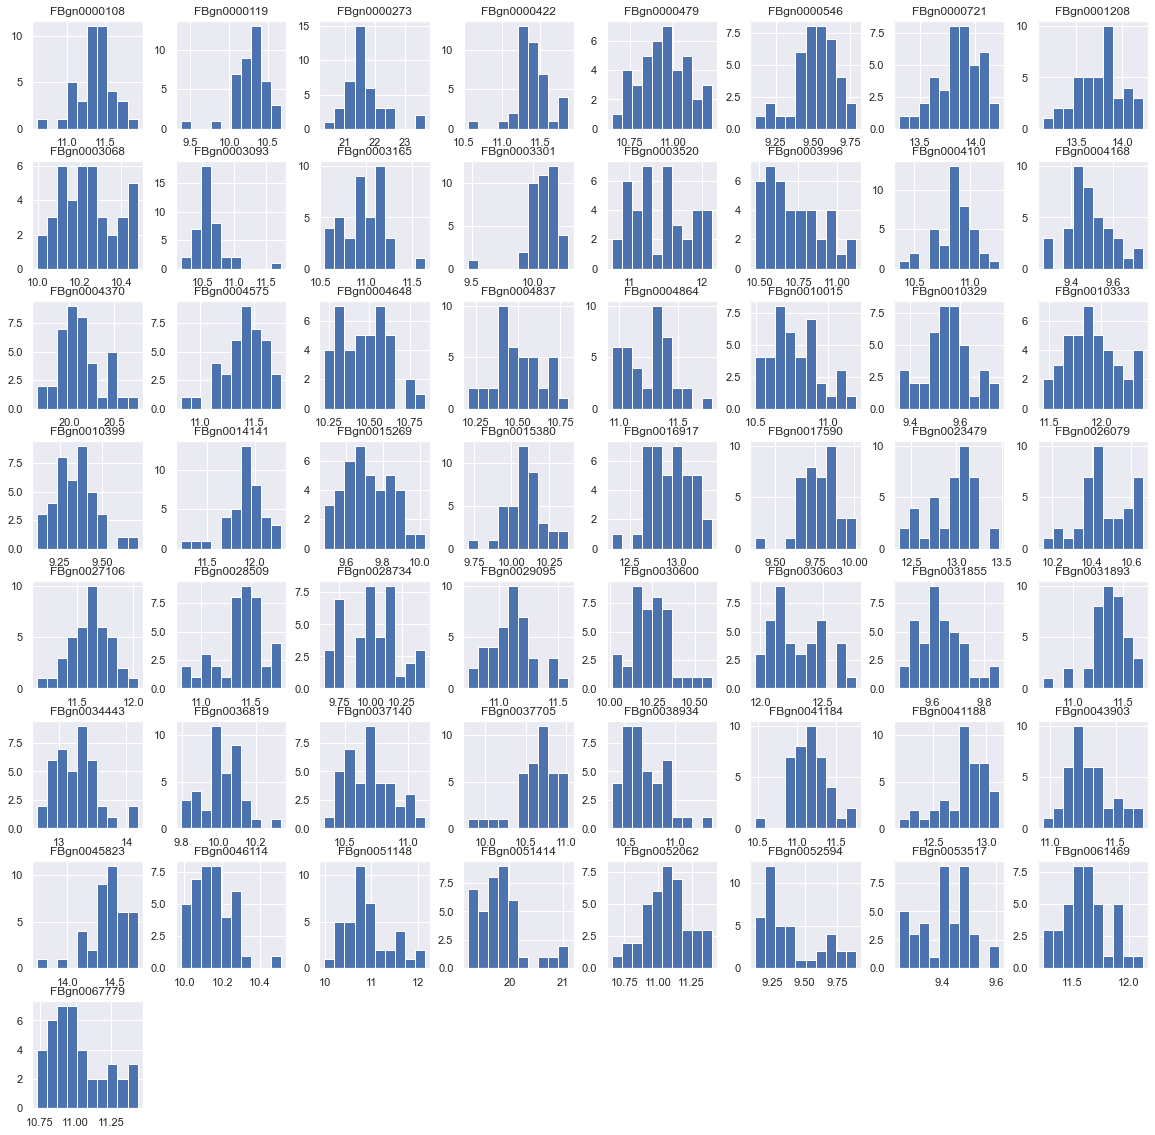

In [67]:
# Try something else: suppose that the data distribution over line for a particular gene should be roughly normal
# => if we can see 2 distribution, there should be 2 populations in lines => it should point out interesting genes

memory_data.hist(figsize=(20, 20)); # Memory genes only

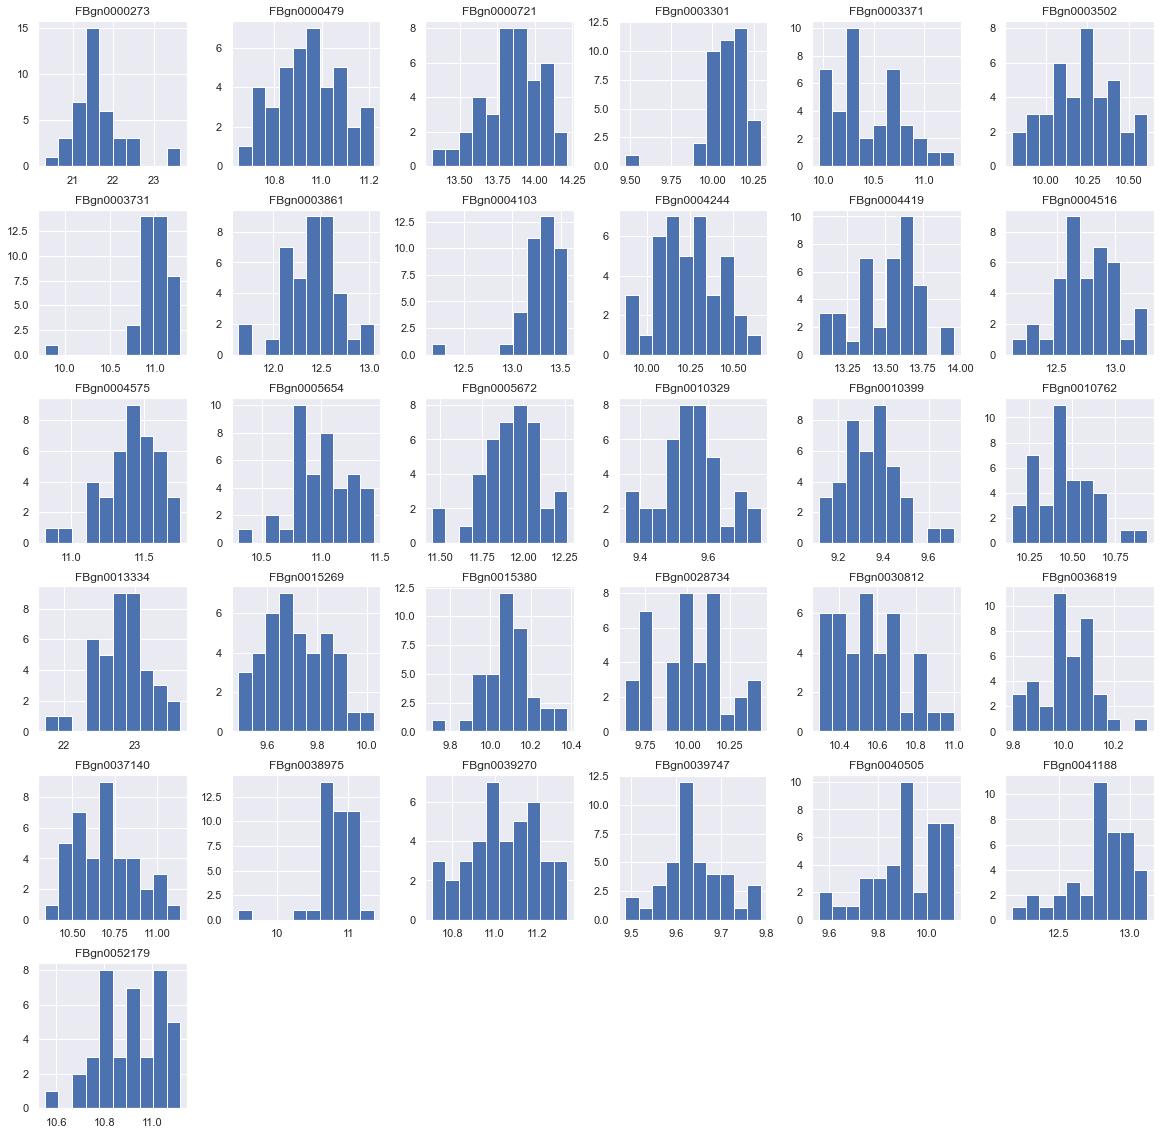

In [68]:
learning_data.hist(figsize=(20, 20)); # Learning genes only

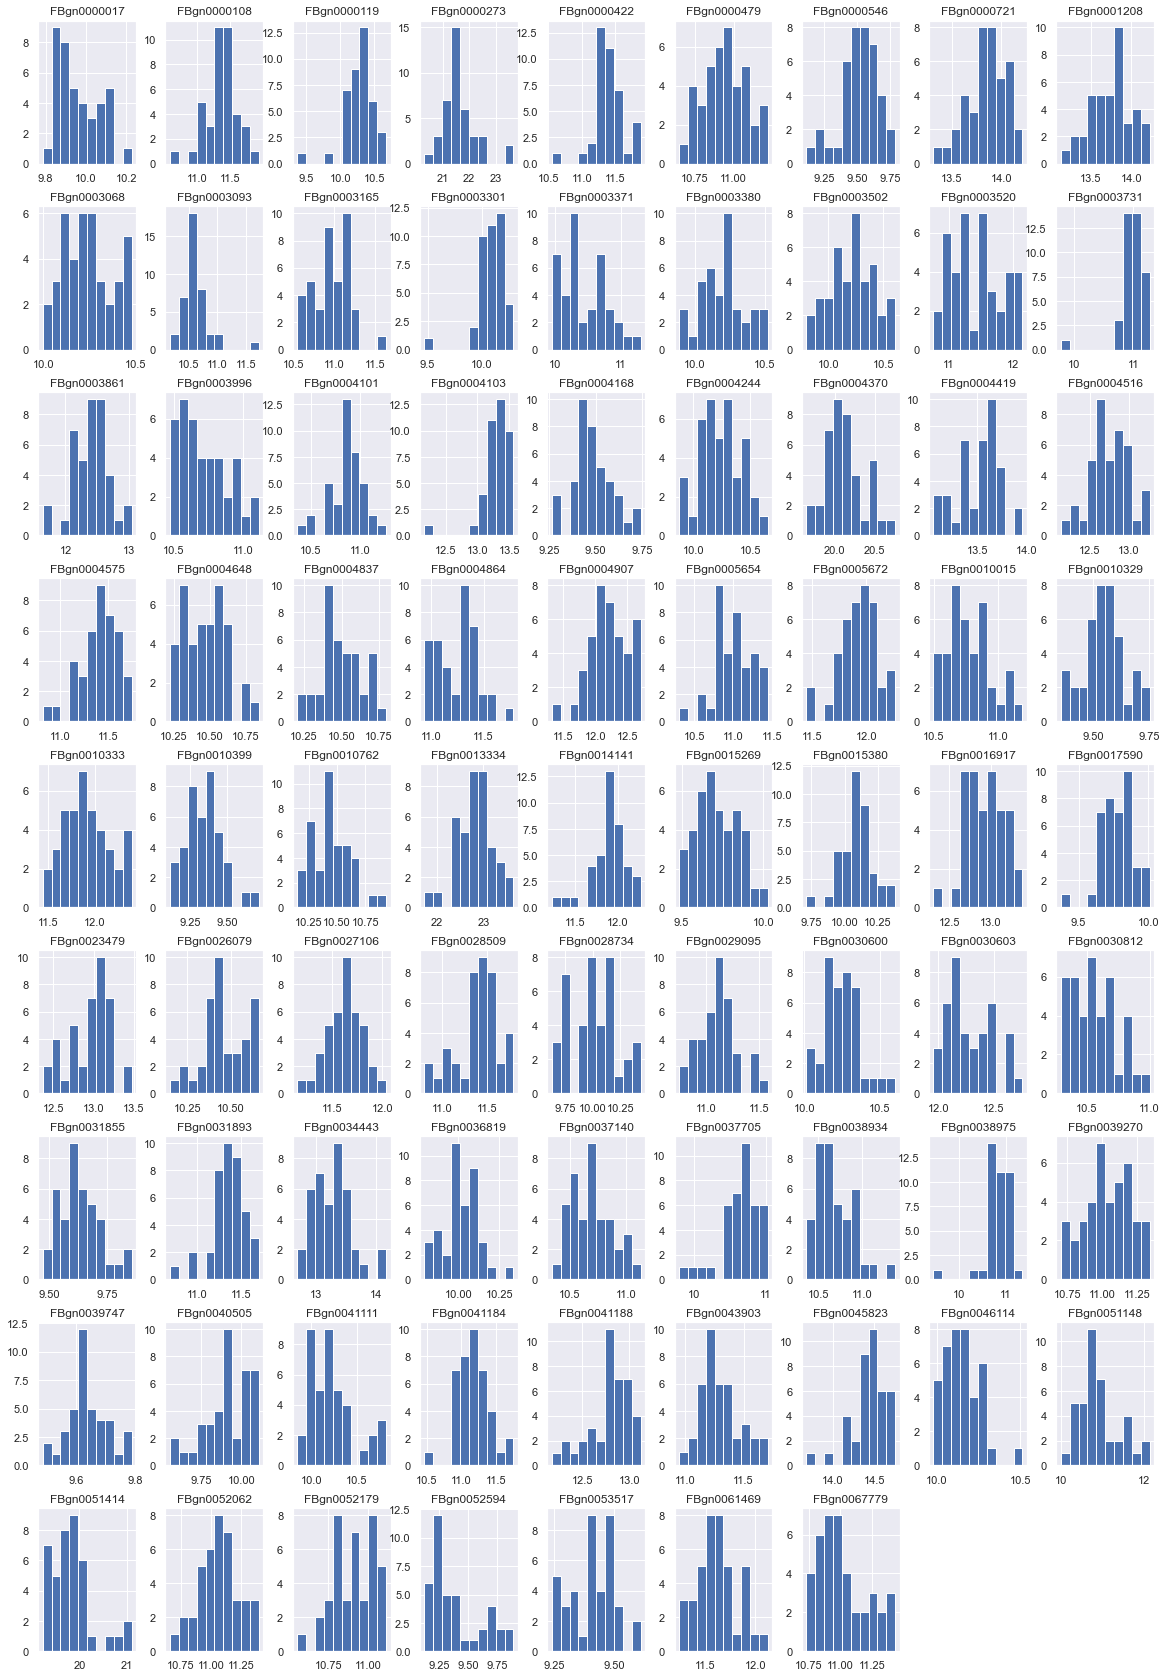

In [69]:
cognition_data.hist(figsize=(20, 30)); # All genes

In [118]:
# Export the dict of interesting genes in a txt file
import json
with open('top_variable_genes_cognition.json', 'w') as json_file:
  json.dump(var_genes, json_file)

# Link with the metabolic rate

In [71]:
# Load the metabolic rate data from the paper "A Quantitative Genomic Approach for Analysis of Fitness and Stress Related Traits in a Drosophila melanogaster Model Population"

METABOLIC_RATE_DATA = "metabolic_rate_quantitative_genetic_analysis_paper.xlsx"

metabolic_rate = pd.read_excel(PATH + METABOLIC_RATE_DATA, sheet_name = 'Sheet1',usecols = [0, 1], skiprows = 0,
                                        names = ['line', 'metabolic rate'])
metabolic_rate.dropna(inplace=True)
metabolic_rate.head()

,line,metabolic rate
0,RAL_208,15.0
1,RAL_313,9.0
2,RAL_357,9.0
3,RAL_358,9.0
4,RAL_362,7.0


In [72]:
# First plot again the expression data accross lines with the selected genes
var_genes

{'cognition': ['FBgn0000273',
  'FBgn0051148',
  'FBgn0051414',
  'FBgn0003520',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0034443',
  'FBgn0004907',
  'FBgn0038975',
  'FBgn0003861'],
 'learning': ['FBgn0000273',
  'FBgn0013334',
  'FBgn0003371',
  'FBgn0038975',
  'FBgn0003861'],
 'memory': ['FBgn0000273',
  'FBgn0051148',
  'FBgn0051414',
  'FBgn0003520',
  'FBgn0034443']}

In [73]:
top_genes_cognition = var_genes['cognition']
top_genes_cognition.append('line')
top_genes_cognition

['FBgn0000273',
 'FBgn0051148',
 'FBgn0051414',
 'FBgn0003520',
 'FBgn0013334',
 'FBgn0003371',
 'FBgn0034443',
 'FBgn0004907',
 'FBgn0038975',
 'FBgn0003861',
 'line']

In [74]:
cognition_genes_top = transcription_data_.columns.intersection(top_genes_cognition)
cognition_data_top = transcription_data_[cognition_genes_top]
cognition_data_top.head()

line,line,FBgn0000273,FBgn0003371,FBgn0003520,FBgn0003861,FBgn0004907,FBgn0013334,FBgn0034443,FBgn0038975,FBgn0051148,FBgn0051414
0,RAL_208,20.922845,10.498765,12.144595,12.539920,12.062025,23.007150,13.464775,9.453778,10.793395,19.728825
1,RAL_301,23.659090,10.730610,10.880705,12.407115,12.184110,22.391820,13.102710,10.722175,12.146140,21.108798
2,RAL_303,22.278525,10.683530,11.263470,11.638940,12.221855,22.505365,12.950215,10.604975,10.400270,19.660724
3,RAL_304,21.521275,10.900375,11.051715,12.615405,11.823760,22.719660,13.364600,10.632490,10.726625,20.018352
4,RAL_306,21.416915,10.900400,11.192645,12.177310,11.994885,23.011780,12.928510,10.704140,10.647610,19.543889


FBgn0000273
FBgn0051148
FBgn0051414
FBgn0003520
FBgn0013334
FBgn0003371
FBgn0034443
FBgn0004907
FBgn0038975
FBgn0003861


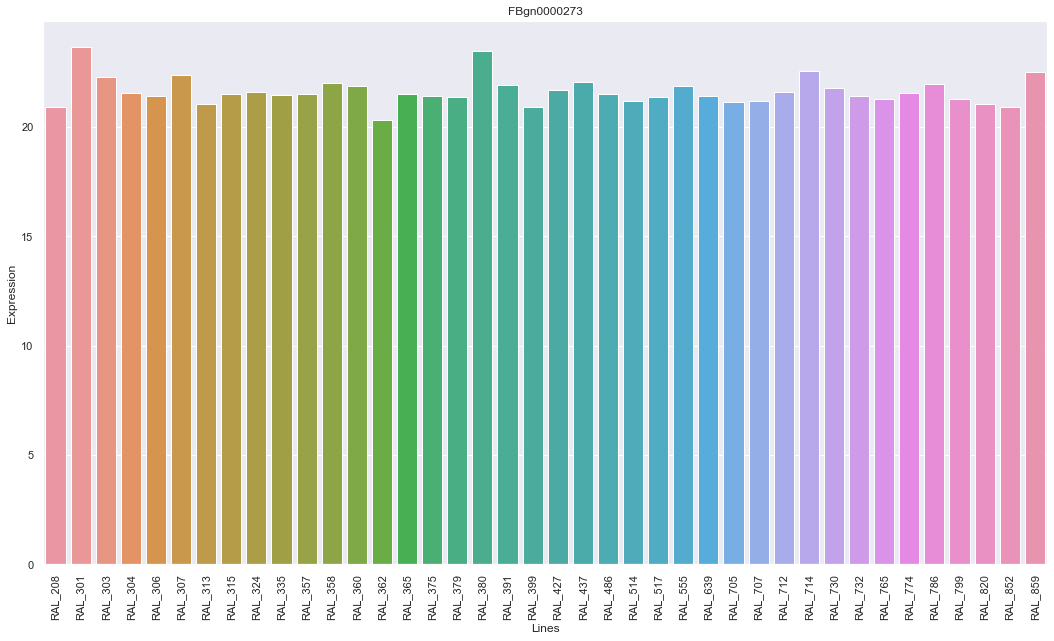

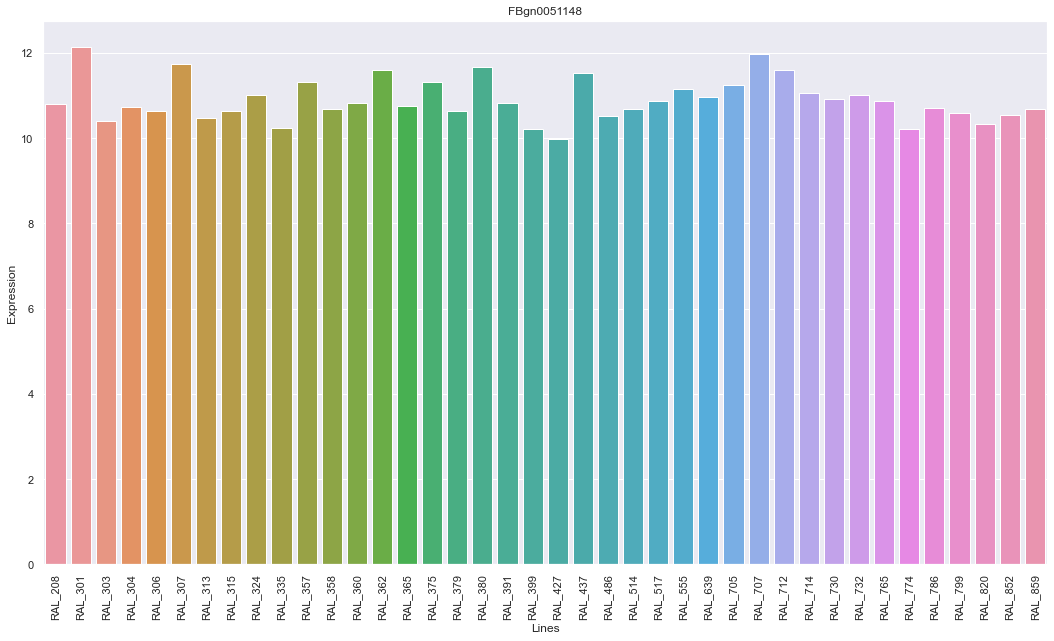

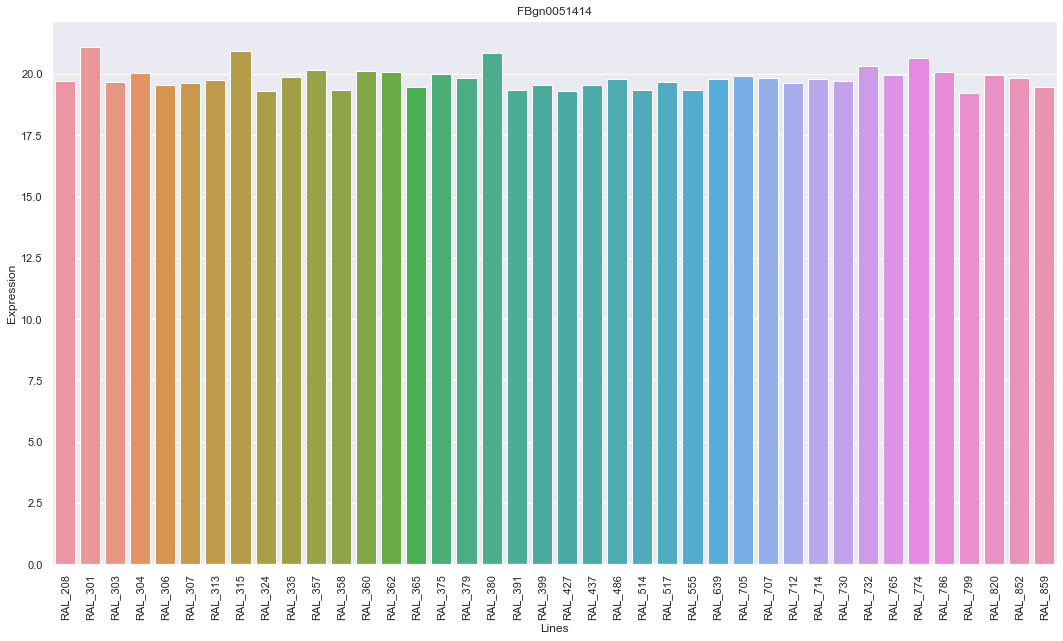

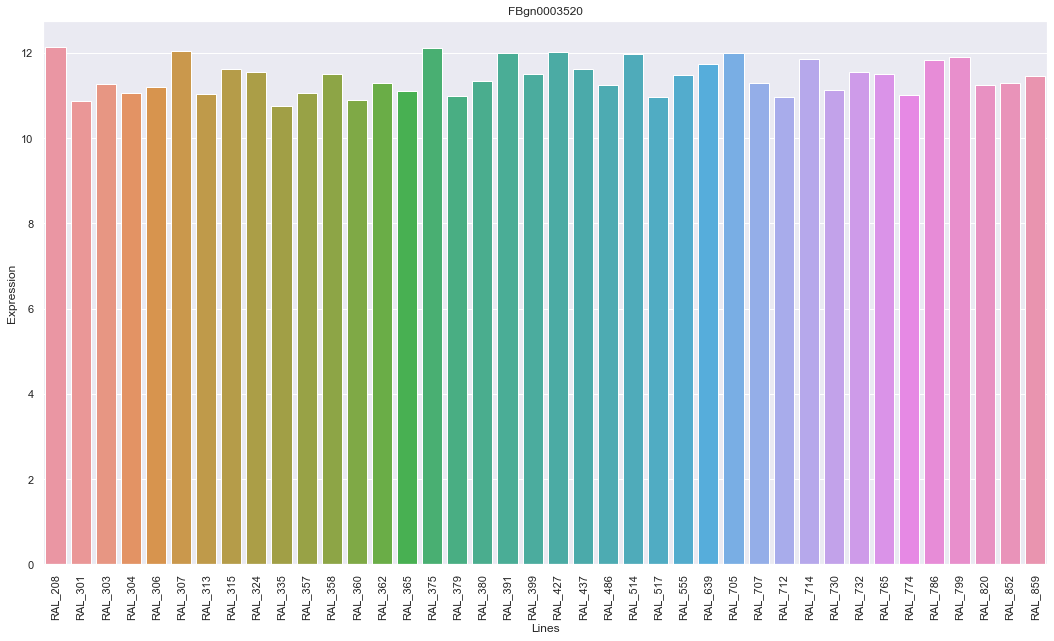

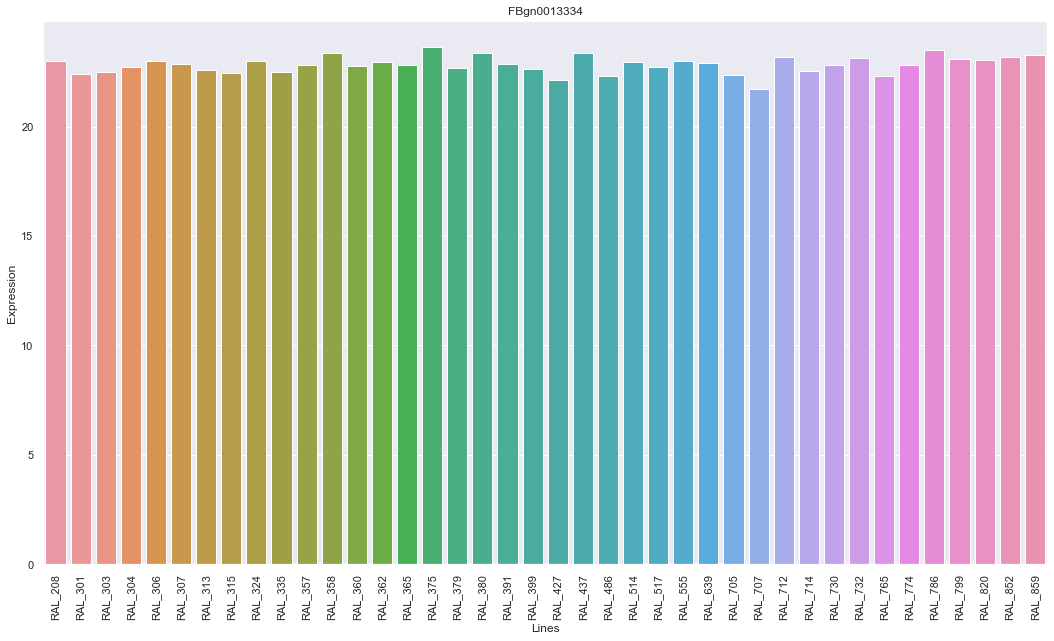

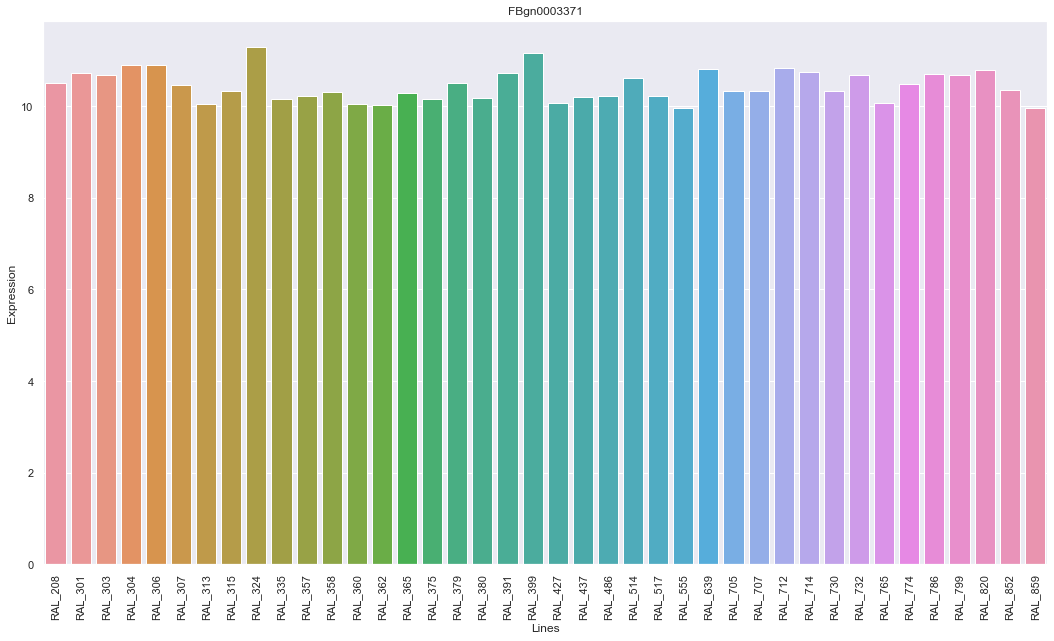

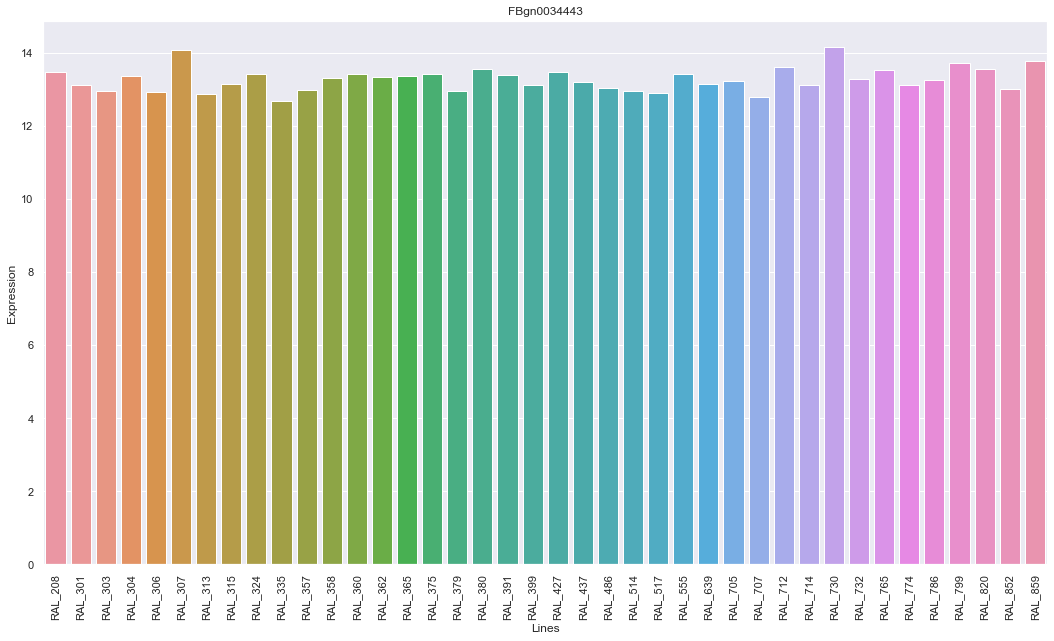

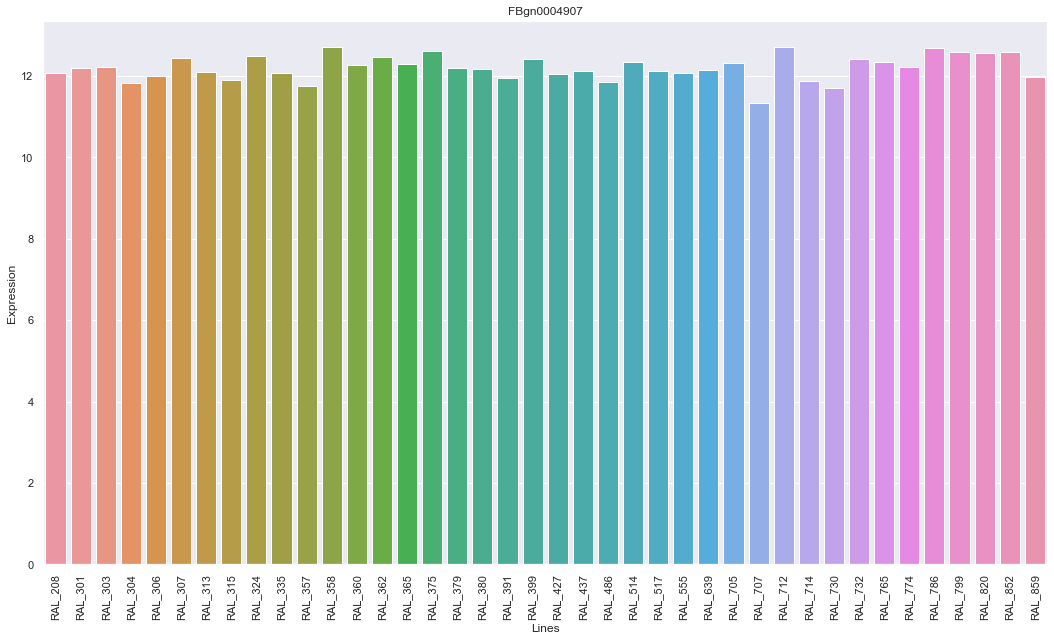

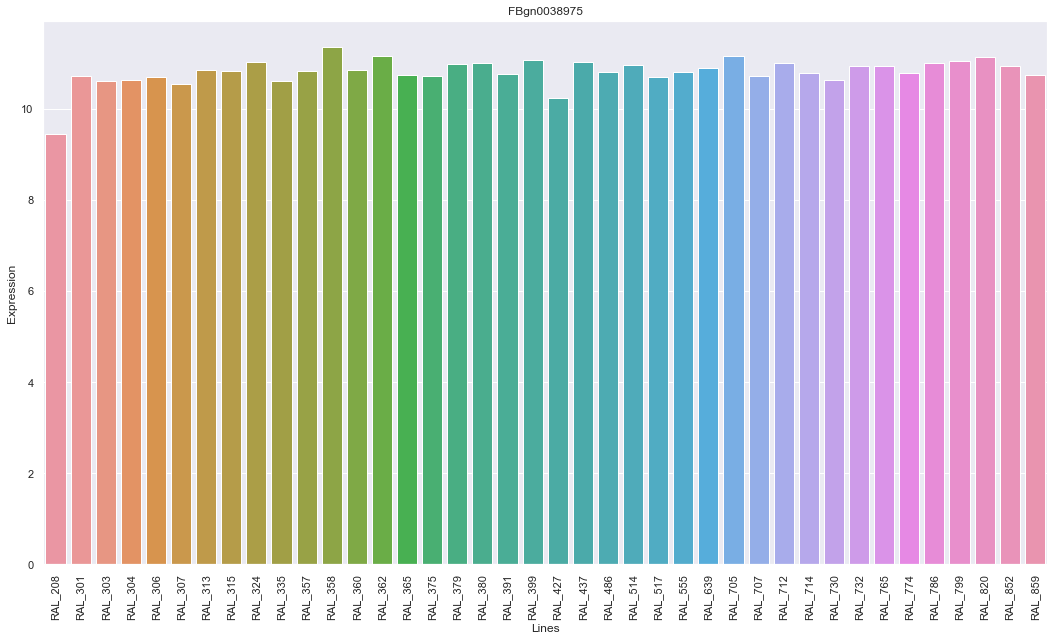

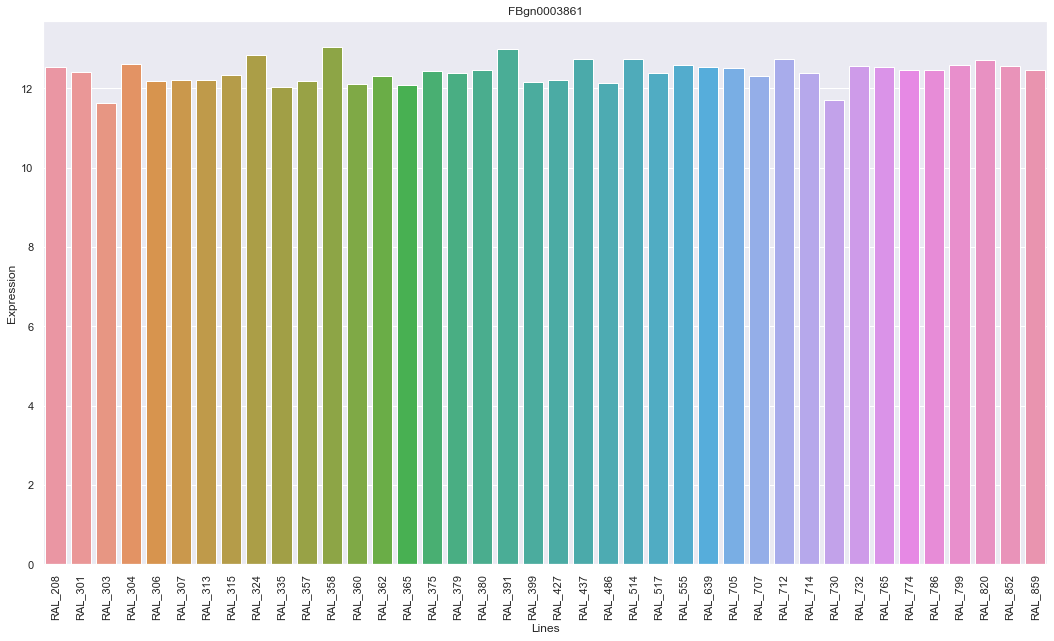

In [75]:
for i in range(len(top_genes_cognition)-1):
    print(top_genes_cognition[i])
    plot_histo_expression(top_genes_cognition[i], cognition_data_top)

In [76]:
# Keep only lines where data about metabolic rate is present
merged = pd.merge(metabolic_rate, cognition_data_top, left_on='line', right_on='line', how='inner')
merged

,line,metabolic rate,FBgn0000273,FBgn0003371,FBgn0003520,FBgn0003861,FBgn0004907,FBgn0013334,FBgn0034443,FBgn0038975,FBgn0051148,FBgn0051414
0,RAL_208,15.0,20.922845,10.498765,12.144595,12.539920,12.062025,23.007150,13.464775,9.453778,10.793395,19.728825
1,RAL_313,9.0,21.035041,10.058600,11.033785,12.201500,12.094795,22.595340,12.858930,10.846540,10.467165,19.738573
2,RAL_357,9.0,21.487610,10.224856,11.048525,12.178870,11.749280,22.809880,12.979920,10.827035,11.326055,20.149725
3,RAL_358,9.0,22.000870,10.311645,11.494290,13.045325,12.711345,23.339560,13.305310,11.359660,10.676380,19.362596
4,RAL_362,7.0,20.319696,10.036986,11.288205,12.316905,12.463555,22.932725,13.345450,11.151790,11.610575,20.085687
5,RAL_365,9.0,21.509035,10.278160,11.112255,12.070355,12.293485,22.827140,13.365810,10.745940,10.765920,19.461370
6,RAL_375,9.0,21.420465,10.165703,12.104890,12.442890,12.601640,23.645685,13.421435,10.716230,11.316110,19.981859
7,RAL_379,10.0,21.371135,10.496705,10.998745,12.390850,12.180815,22.681830,12.946385,10.981510,10.637945,19.832141
8,RAL_380,9.0,23.460460,10.169535,11.336185,12.468840,12.170160,23.374585,13.557705,11.003600,11.669615,20.834754
9,RAL_391,8.0,21.890915,10.730140,11.985380,12.991915,11.955405,22.878170,13.399795,10.759980,10.822040,19.346284


In [77]:
sr_correlations = pd.DataFrame()
sr_correlations['correlated_gene'] = top_genes_cognition[:-1]
sr_correlations

,correlated_gene
0,FBgn0000273
1,FBgn0051148
2,FBgn0051414
3,FBgn0003520
4,FBgn0013334
5,FBgn0003371
6,FBgn0034443
7,FBgn0004907
8,FBgn0038975
9,FBgn0003861


In [78]:
# Compute the Spearman rank correlation for each pair of metabolic rate - gene of interest
sr_correlations['sr_correlation'] = sr_correlations.apply(lambda x: stats.spearmanr(merged['metabolic rate'], merged[x['correlated_gene']])[0], axis=1)
sr_correlations['p_value'] = sr_correlations.apply(lambda x: stats.spearmanr(merged['metabolic rate'], merged[x['correlated_gene']])[1], axis=1)
sr_correlations

,correlated_gene,sr_correlation,p_value
0,FBgn0000273,-0.238263,0.262213
1,FBgn0051148,-0.267706,0.205975
2,FBgn0051414,-0.330216,0.115040
3,FBgn0003520,-0.179830,0.400439
4,FBgn0013334,0.087876,0.683043
5,FBgn0003371,-0.203837,0.339392
6,FBgn0034443,0.084706,0.693930
7,FBgn0004907,0.059792,0.781372
8,FBgn0038975,-0.092859,0.666058
9,FBgn0003861,0.014948,0.944731


In [79]:
# Quick plot of the correlations
def plot_correlations(sr_correlations):
    sns.set() # Set the seaborn default aesthetics 

    f, ax = plt.subplots(figsize=(10, 6))
    labels = sr_correlations['correlated_gene'].values
    sns.barplot(x = 'correlated_gene', y = 'sr_correlation', data = sr_correlations,
                     palette = (sr_correlations['sr_correlation'] > 0).map({True: 'tab:orange', False: 'tab:blue'}))

    ax.set_title('Correlations with the metabolic rate')
    #ax.get_legend().remove()
    ax.set(ylabel='R', xlabel='')
    ax.axhline(y=0, color='black') # Set the horizontal line at y=0
    ax.set_xticklabels(labels, rotation=90) # Vertical labels for the x axis

    # Set the width of the bars if desired
    for bar in ax.patches:
        bar.set_width(0.4)

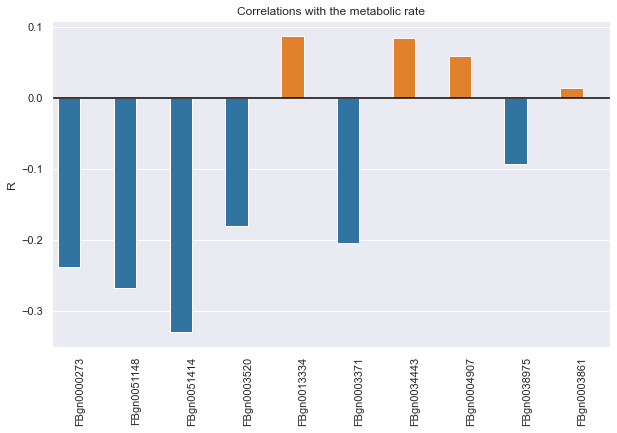

In [80]:
plot_correlations(sr_correlations)

In [95]:
# Plot the metabolic rate vs a specific gene expression for each line

def plot_metabolic_rate_lines_vs_gene(data_, gene):
    sns.set() # Set the seaborn default aesthetics 

    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.scatterplot(x = 'variance', y = 'mean', data = data_);

    #ax.get_legend().remove()
    ax.set_title('Variance vs mean over genes');
    ax.set(ylabel='Variance', xlabel='Mean');

In [93]:
# Plot the metabolic rate vs a specific gene expression for each line

def plot_metabolic_rate_lines_vs_gene(df, gene):
    sns.set() # Set the seaborn default aesthetics 
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection = '3d')

    x = np.linspace(0, 10, df.shape[0])
    y = df['metabolic rate']
    z = df[gene]

    ax.set_xlabel("line")
    ax.set_ylabel("metabolic rate")
    ax.set_zlabel(gene)
    ax.set_xticklabels(df['line'], rotation=90) # Vertical labels for the x axis
    
    ax.scatter(x, y, z)

In [117]:
#plot_metabolic_rate_lines_vs_gene(merged, top_genes_cognition[0])

In [114]:
# Plot the metabolic rate vs a specific gene expression for each line

def plot_metabolic_rate_lines_vs_gene_(df, gene):
    sns.set() # Set the seaborn default aesthetics 

    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.scatterplot(x = gene, y = 'metabolic rate', data = df, hue = 'line');

    ax.set_title('Metabolic rate vs ' + gene + ' expression accross lines');
    ax.set(ylabel='Metabolic rate', xlabel='Gene expression of '+ gene);

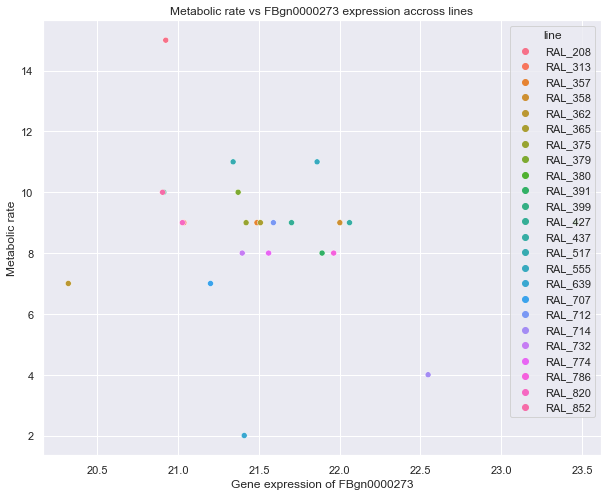

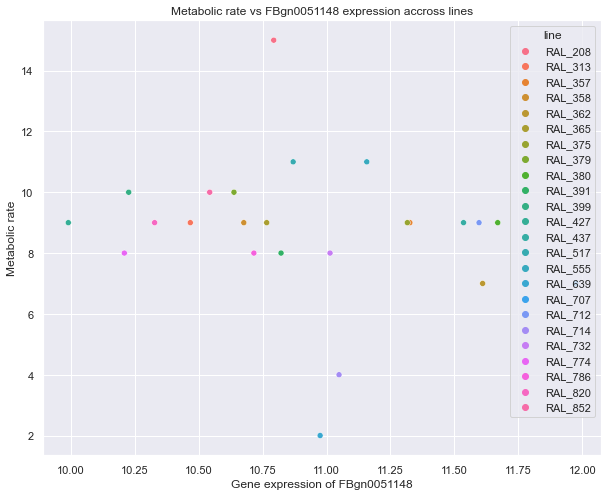

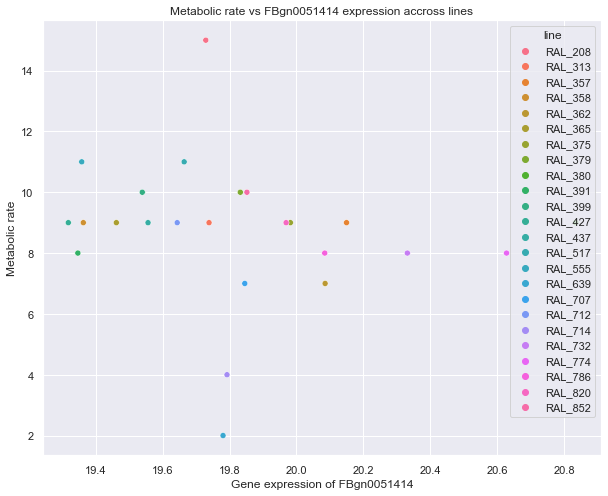

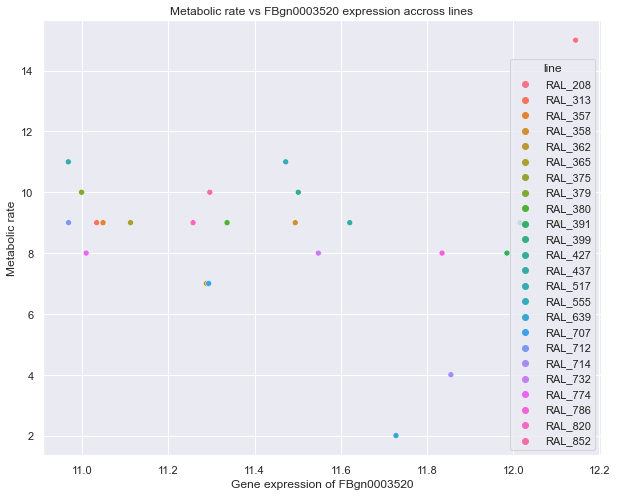

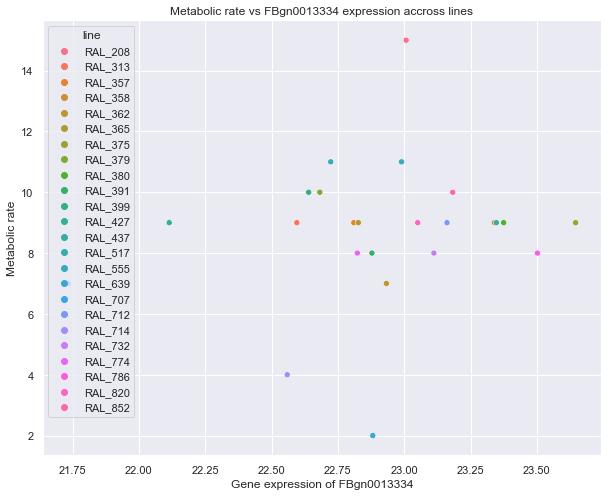

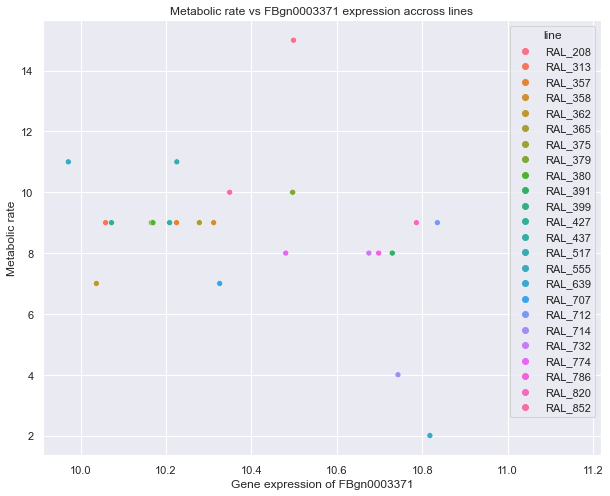

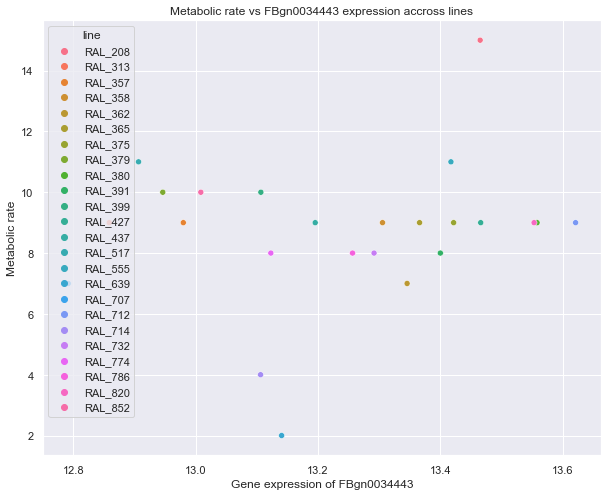

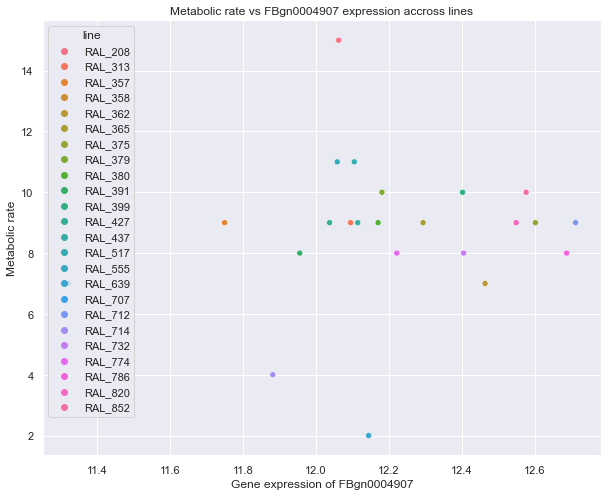

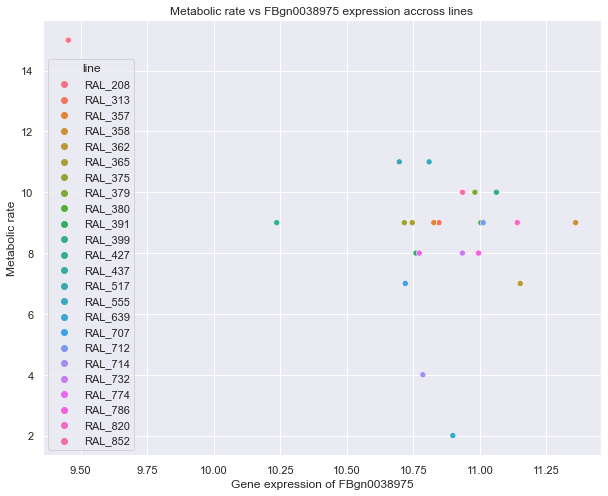

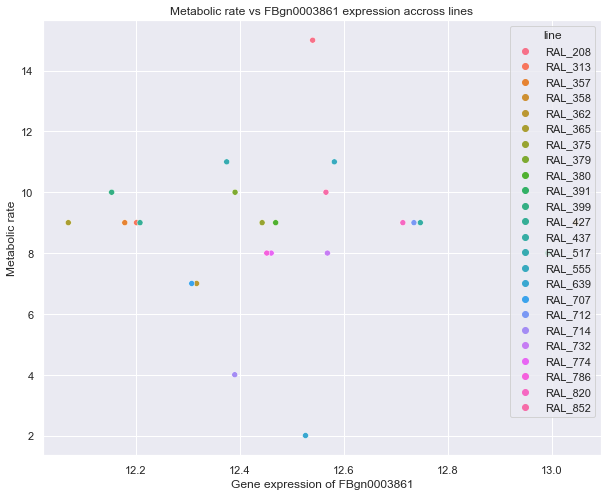

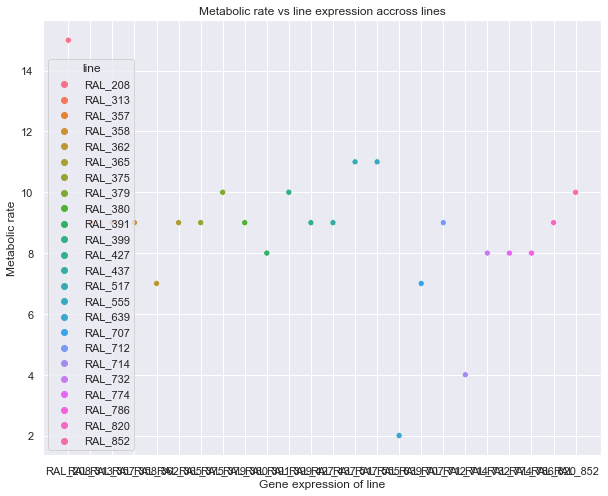

In [116]:
for i in range(len(top_genes_cognition)):
    plot_metabolic_rate_lines_vs_gene_(merged, top_genes_cognition[i])

# Link with the lifespan